In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt

os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/lib/cuda'
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [3]:
import tensorflow as tf
from tensorflow import keras

print("GPU available:", len(tf.config.list_physical_devices('GPU')))

2023-05-21 20:34:46.111957: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU available: 1


In [4]:
from data_preprocessing import DataProcessor, Dataset
from model import OCCModel
from autoencoder import MLPAutoencoder
from var_autoencoder import MLPVarAutoencoder
from loss import WeightedMSE

In [5]:
PROJECT_PATH = '/raid/shumnov/music-style-performer/'

In [16]:
architecture = [((256, 128), (0, 0), (128, 256), (0, 0)), 
                ((256, 128, 128), (0.1, 0.1, 0.1), (128, 128, 256), (0.1, 0.1, 0.1)), 
                ((256, 256, 128), (0.4, 0.2, 0.1), (128, 256, 256), (0.1, 0.1, 0.1))]
noise = [0.02, 0.08]
latent_dim = [64, 32]
absolute_velocities = [True, False]

In [12]:
def test(av, ld, n, arch, name, legw=1, checkpoint_id=None, epochs=10):
    print(name)
    
    dp = DataProcessor(
        notes_qty=64, 
        include_first_tone=False, 
        absolute_velocities=av)
    
    dset = Dataset(dp, 64)
    
    print('Loading dataset...')
    dset.load_dset(PROJECT_PATH + 'data/dset64.npy', 2000)
    print('Dataset loaded')
    
    autoencoder = MLPAutoencoder(
        input_size=dp.input_size,
        latent_dim=ld,
        noise=n,
        encoder_layers=arch[0],
        encoder_dropout=arch[1],
        decoder_layers=arch[2],
        decoder_dropout=arch[3])
    
    loss = WeightedMSE(
        vel_mask=dp.vel_mask, 
        leg_mask=dp.leg_mask, 
        first_last_mask=dp.first_last_mask, 
        vel_weight=1, 
        leg_weight=legw,
        first_last_weight=1)
    
    model = OCCModel(
        autoencoder=autoencoder,
        dataprocessor=dp,
        dist_weight=1, 
        vel_weight=1, 
        leg_weight=legw
    )
    model.compile(
        modelsdir=PROJECT_PATH+'traindata/ae/64',
        name=name, 
        optimizer=keras.optimizers.Adam(3e-5),
        loss=loss,
        ckpt_epochs=1
    )
    model.summary()
    
    if checkpoint_id is not None:
        model.restore(checkpoint_id)
    
    print('Start training...')
    model.fit(dset, epochs, 3)

In [ ]:
for ld in range(len(latent_dim)):
    for av in range(len(absolute_velocities)):
        for n in range(len(noise)):
            for a in range(len(architecture)):
                test(absolute_velocities[av], latent_dim[ld], noise[n], architecture[a], f'{ld}{av}{n}{a}')

1011
Loading dataset...
Dataset loaded
Start training...
Epoch 1/30
82301/82301 - 297s - loss: 0.2838 - val_loss: 0.2568 - occ_accuracy: 0.1960 - 297s/epoch - 4ms/step
Epoch 2/30
82301/82301 - 295s - loss: 0.2633 - val_loss: 0.2510 - occ_accuracy: 0.1964 - 295s/epoch - 4ms/step
Epoch 3/30
82301/82301 - 296s - loss: 0.2604 - val_loss: 0.2472 - occ_accuracy: 0.1994 - 296s/epoch - 4ms/step
Epoch 4/30
82301/82301 - 296s - loss: 0.2575 - val_loss: 0.2463 - occ_accuracy: 0.1984 - 296s/epoch - 4ms/step
Epoch 5/30
82301/82301 - 297s - loss: 0.2567 - val_loss: 0.2459 - occ_accuracy: 0.1983 - 297s/epoch - 4ms/step
Epoch 6/30
82301/82301 - 296s - loss: 0.2559 - val_loss: 0.2456 - occ_accuracy: 0.1982 - 296s/epoch - 4ms/step
Epoch 7/30
82301/82301 - 294s - loss: 0.2553 - val_loss: 0.2452 - occ_accuracy: 0.1978 - 294s/epoch - 4ms/step
Epoch 8/30
82301/82301 - 296s - loss: 0.2545 - val_loss: 0.2451 - occ_accuracy: 0.1973 - 296s/epoch - 4ms/step
Epoch 9/30
82301/82301 - 296s - loss: 0.2538 - val_loss

/raid/shumnov/music-style-performer/src/discriminator/data_preprocessing.py:236: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3, 2, figsize=(10, 10))


82301/82301 - 294s - loss: 0.2352 - val_loss: 0.2248 - occ_accuracy: 0.2002 - 294s/epoch - 4ms/step
Epoch 22/30
82301/82301 - 294s - loss: 0.2339 - val_loss: 0.2230 - occ_accuracy: 0.2001 - 294s/epoch - 4ms/step
Epoch 23/30
82301/82301 - 295s - loss: 0.2327 - val_loss: 0.2210 - occ_accuracy: 0.2003 - 295s/epoch - 4ms/step
Epoch 24/30
82301/82301 - 294s - loss: 0.2315 - val_loss: 0.2196 - occ_accuracy: 0.2002 - 294s/epoch - 4ms/step
Epoch 25/30
82301/82301 - 294s - loss: 0.2304 - val_loss: 0.2181 - occ_accuracy: 0.2000 - 294s/epoch - 4ms/step
Epoch 26/30
82301/82301 - 296s - loss: 0.2294 - val_loss: 0.2168 - occ_accuracy: 0.1999 - 296s/epoch - 4ms/step
Epoch 27/30
82301/82301 - 295s - loss: 0.2285 - val_loss: 0.2154 - occ_accuracy: 0.1996 - 295s/epoch - 4ms/step
Epoch 28/30
82301/82301 - 295s - loss: 0.2277 - val_loss: 0.2144 - occ_accuracy: 0.1996 - 295s/epoch - 4ms/step
Epoch 29/30
82301/82301 - 295s - loss: 0.2269 - val_loss: 0.2134 - occ_accuracy: 0.1997 - 295s/epoch - 4ms/step
Epoc

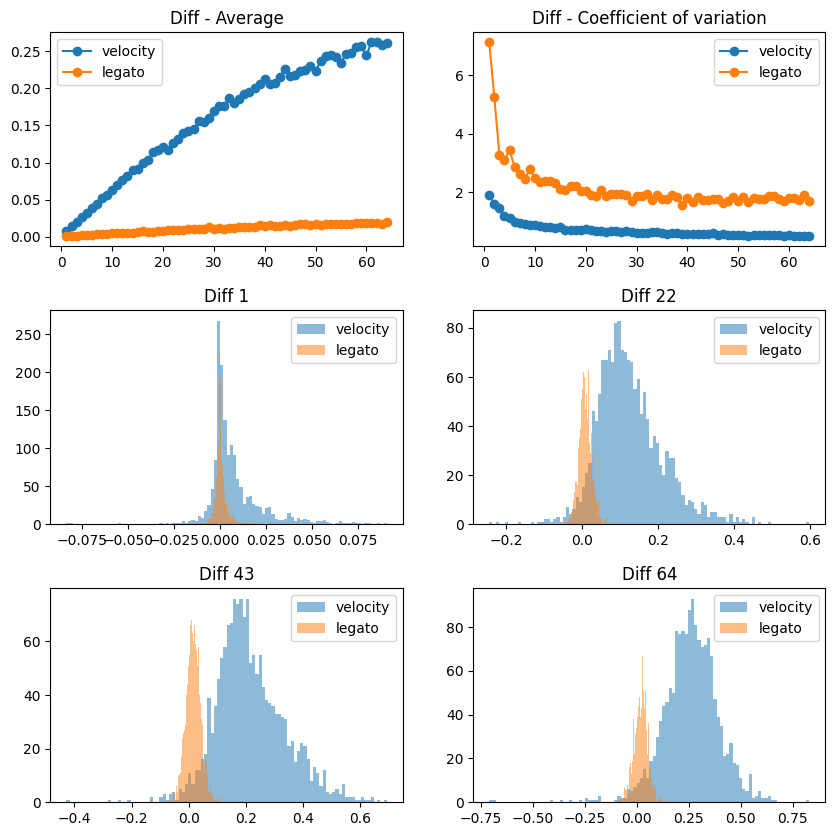

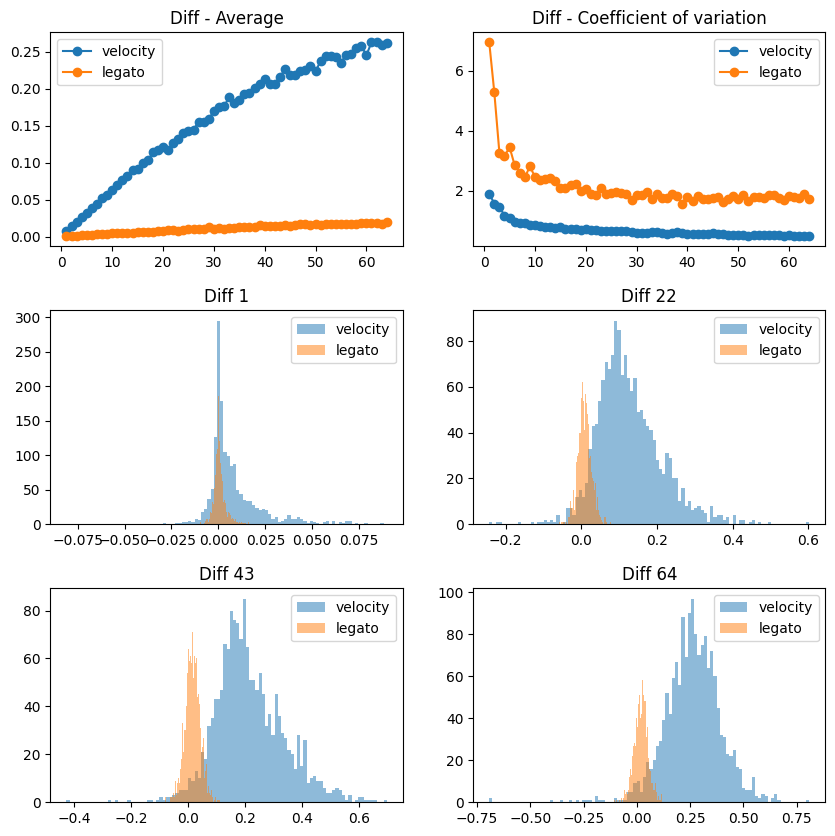

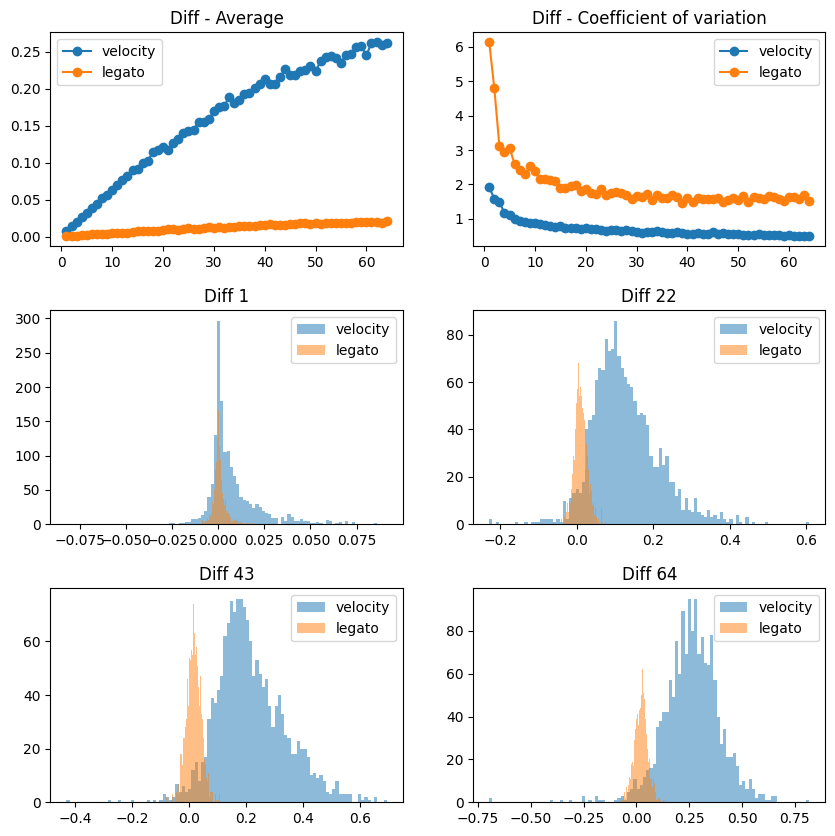

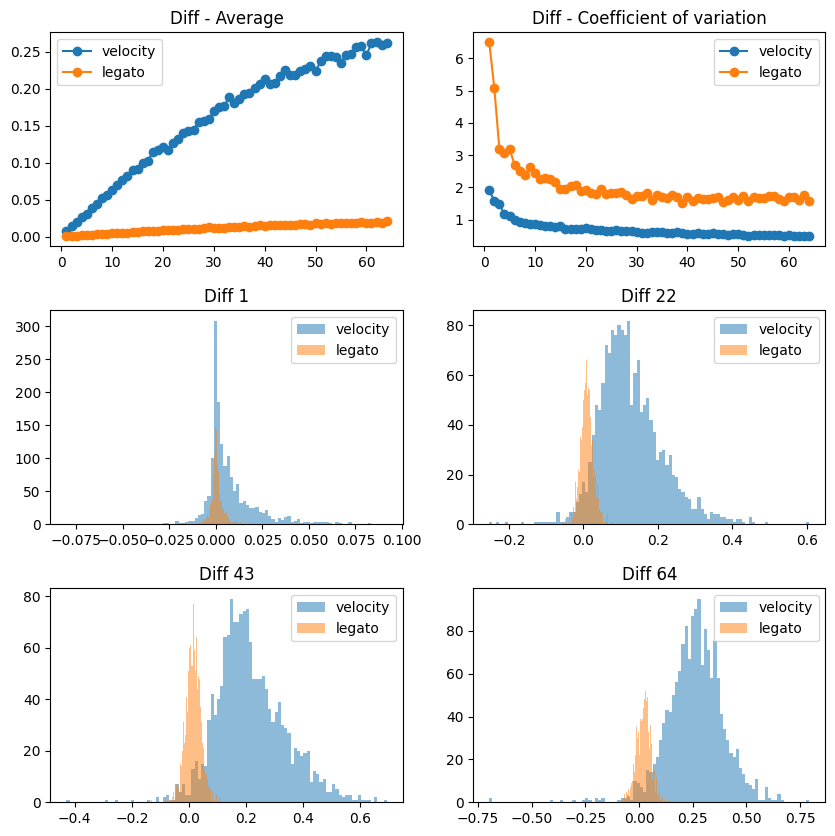

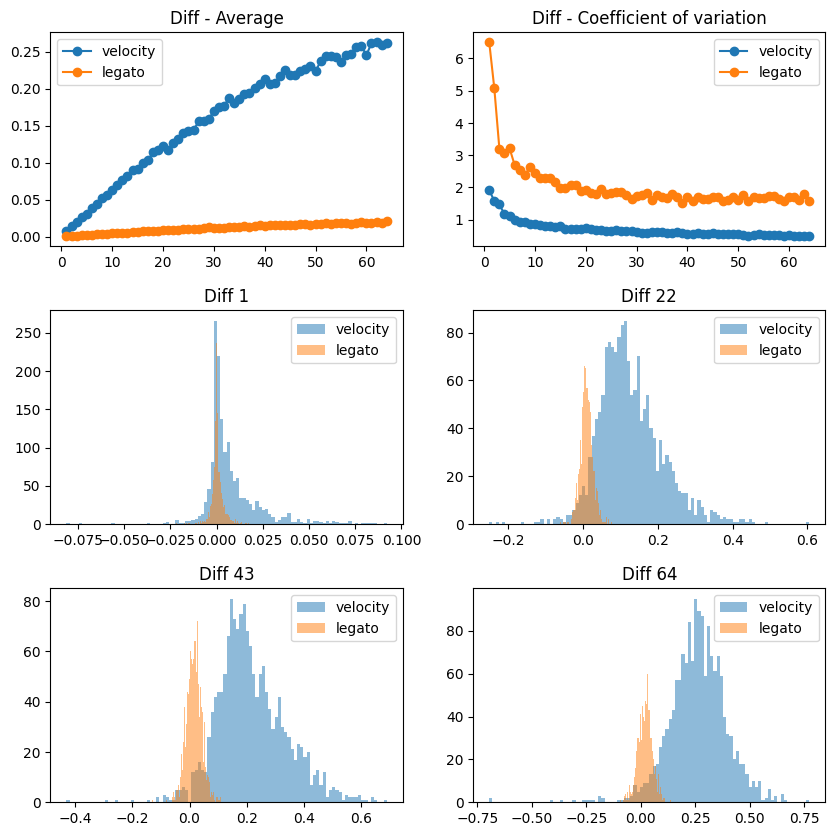

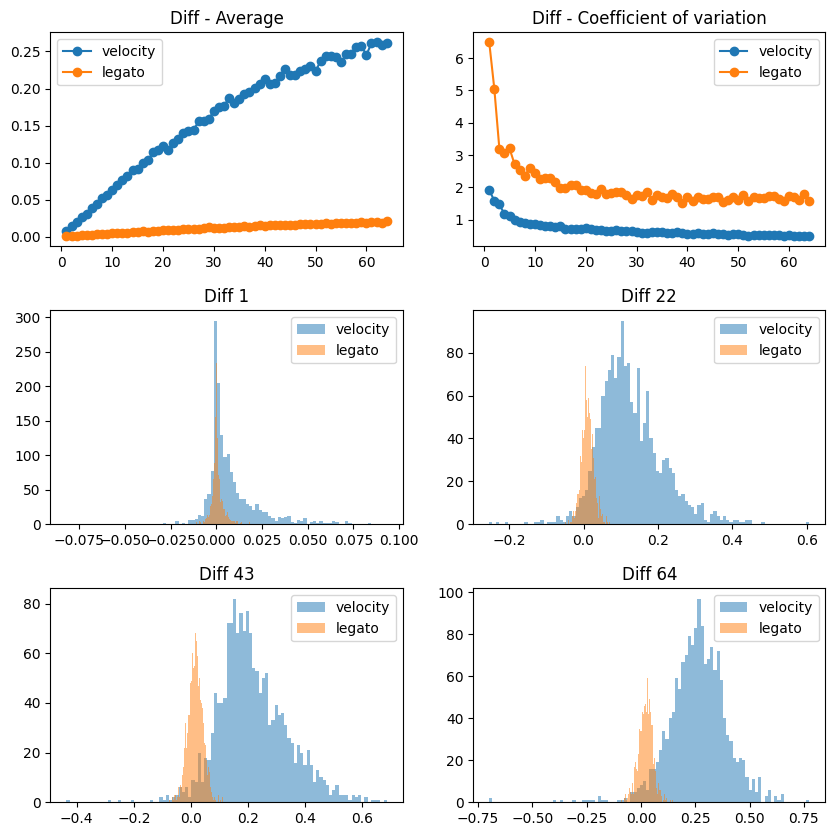

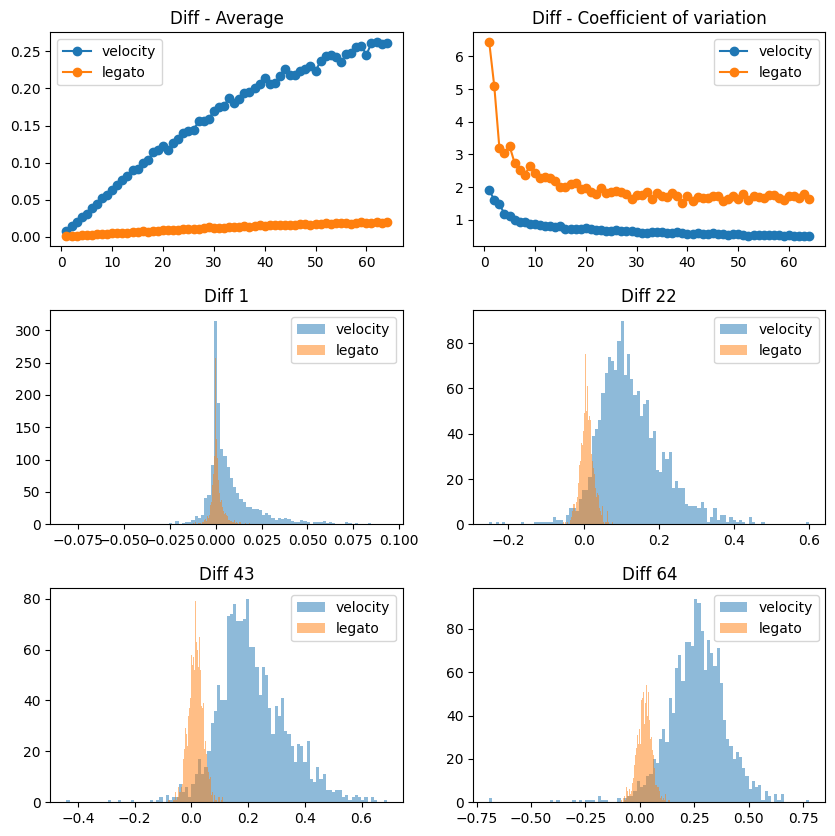

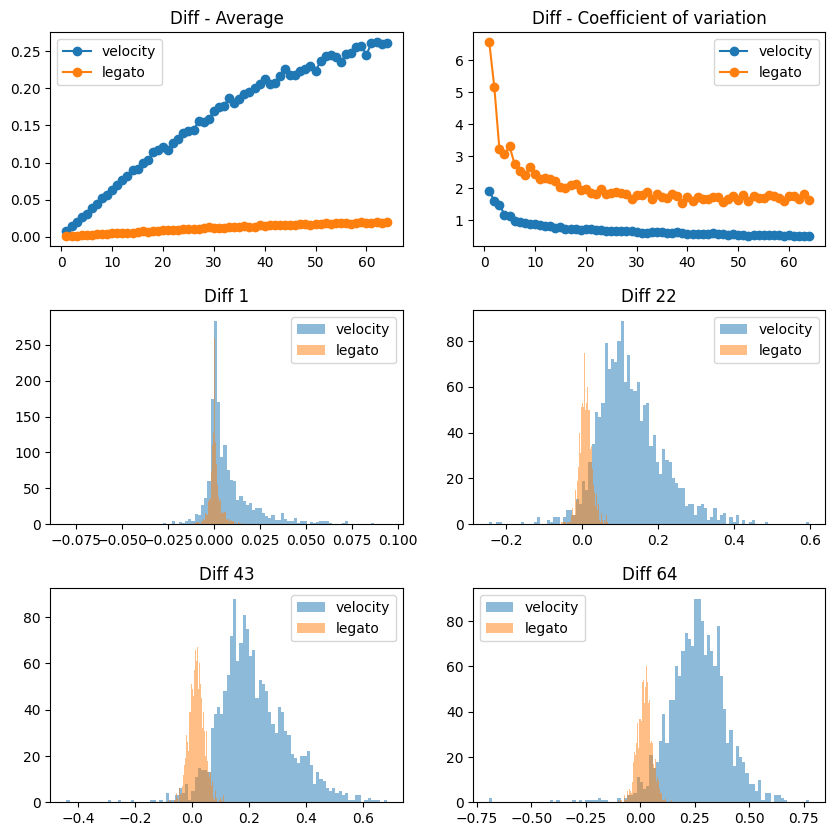

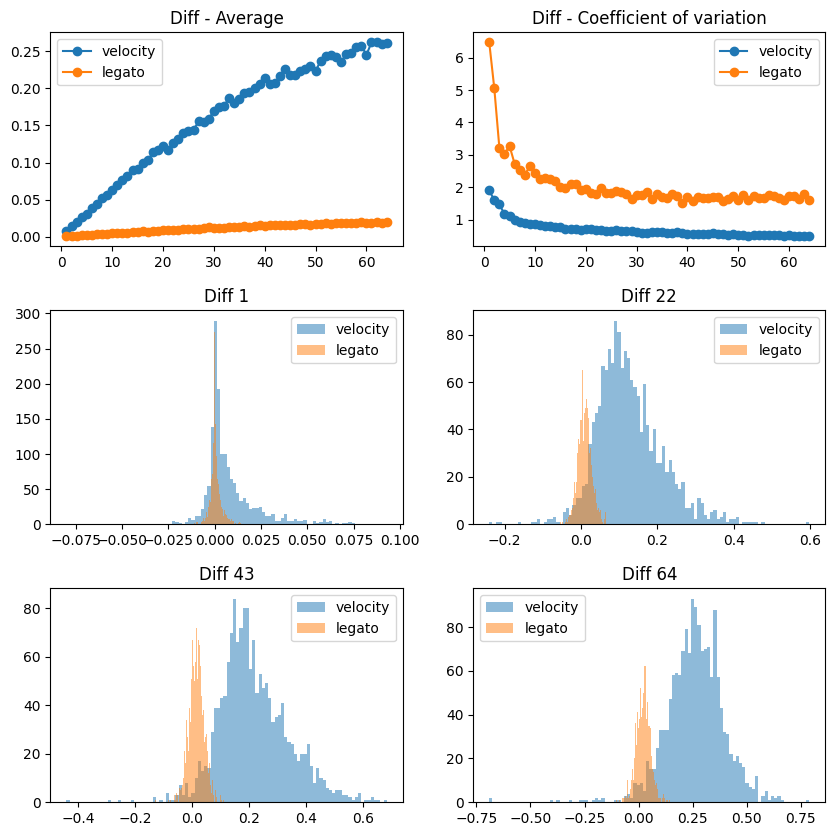

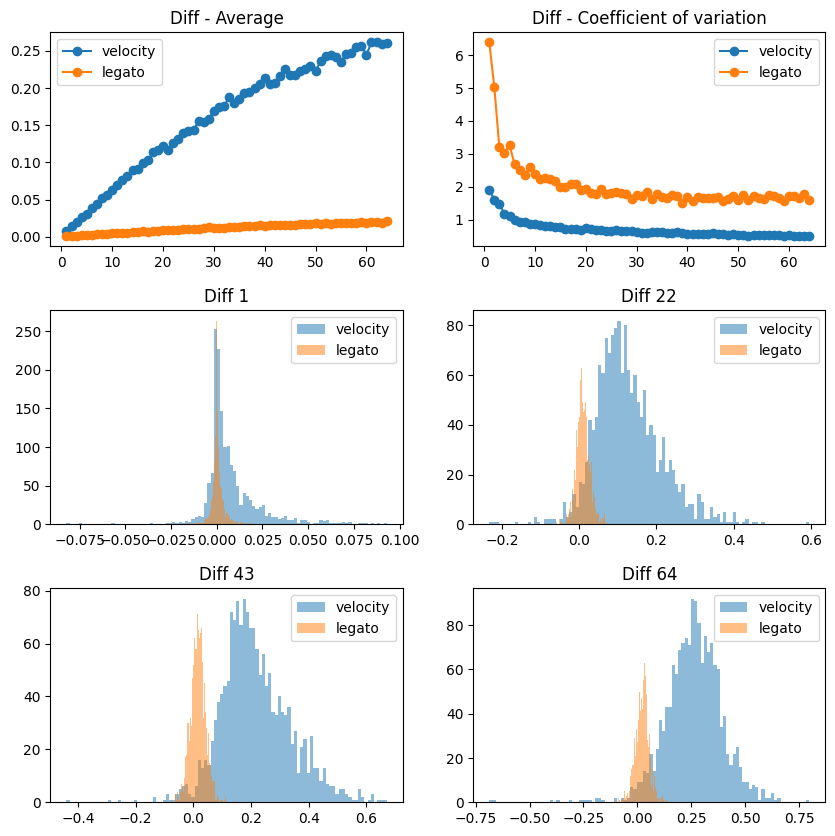

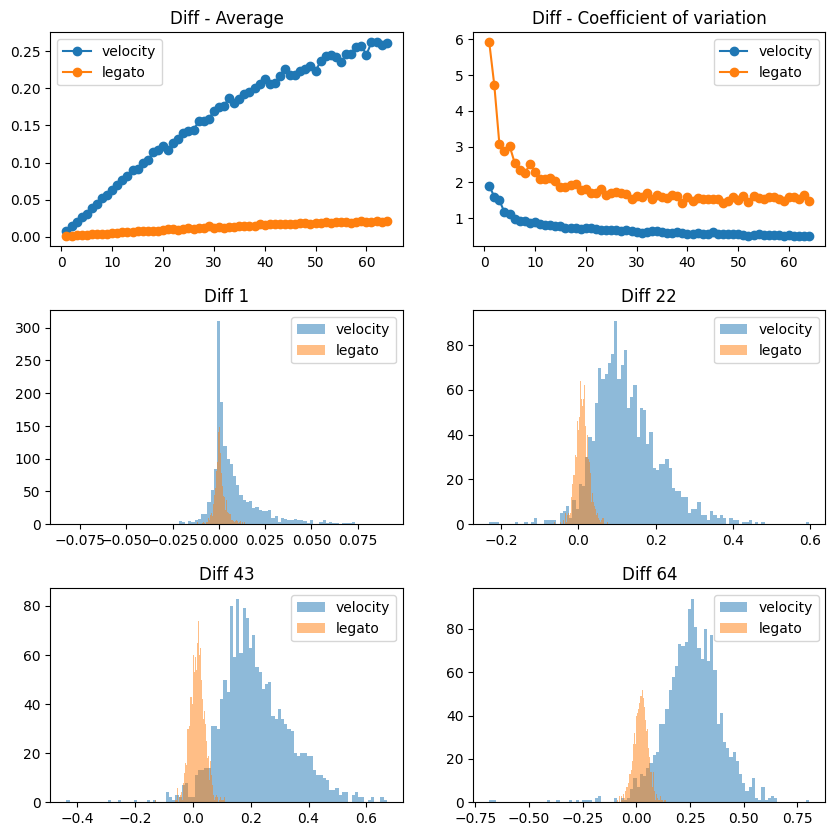

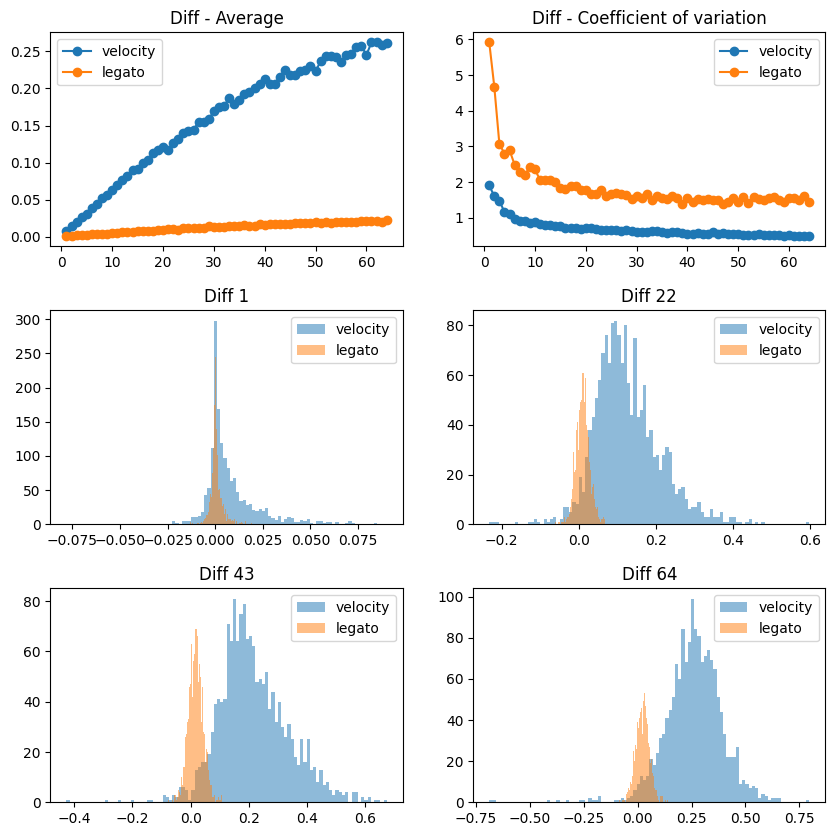

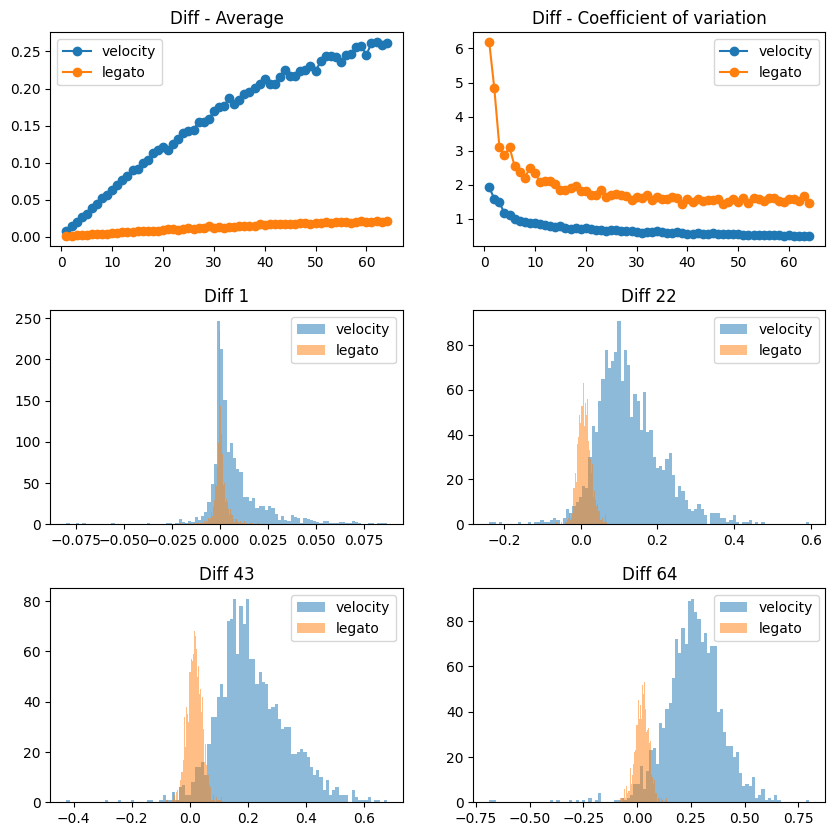

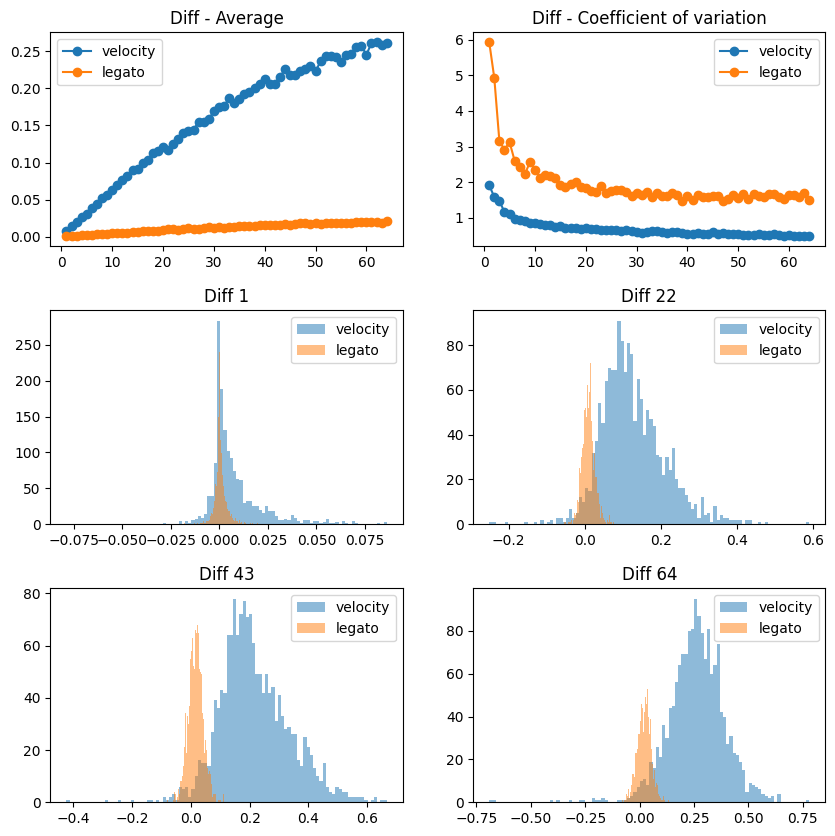

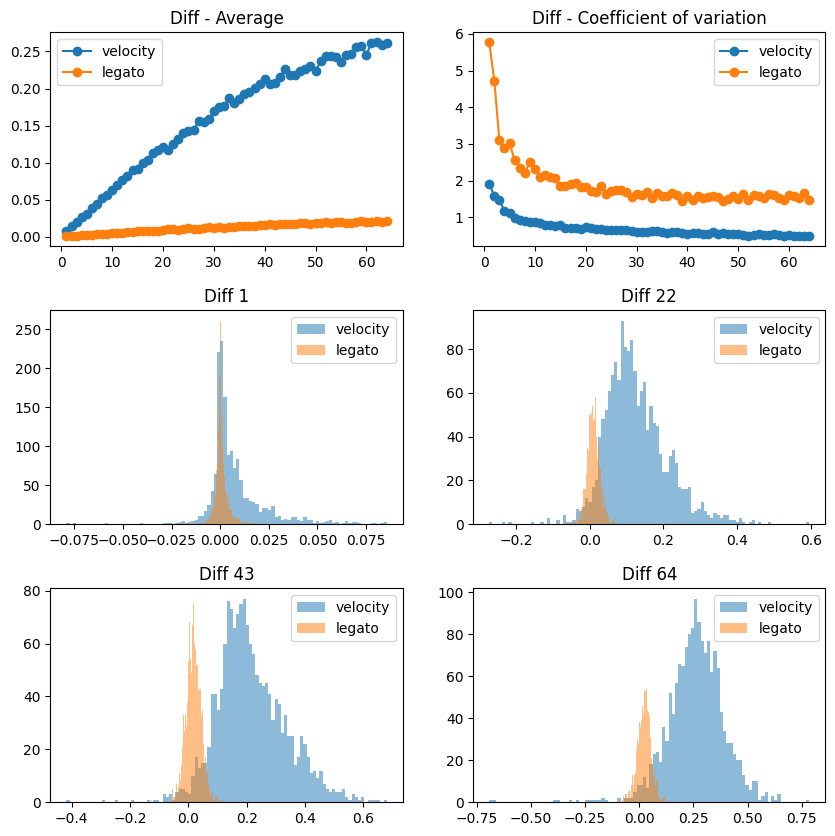

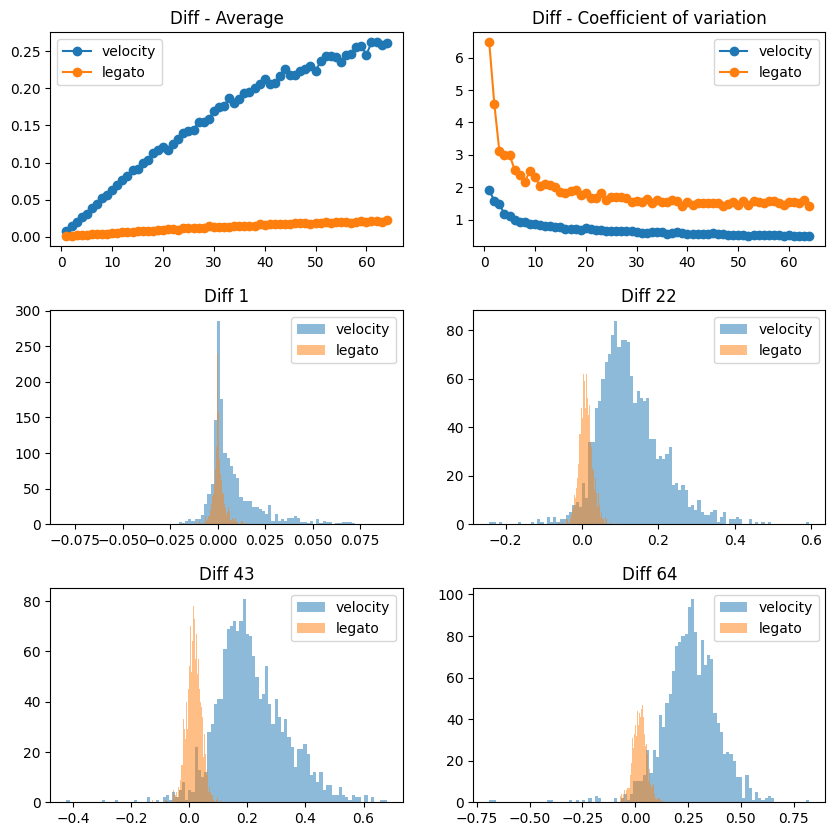

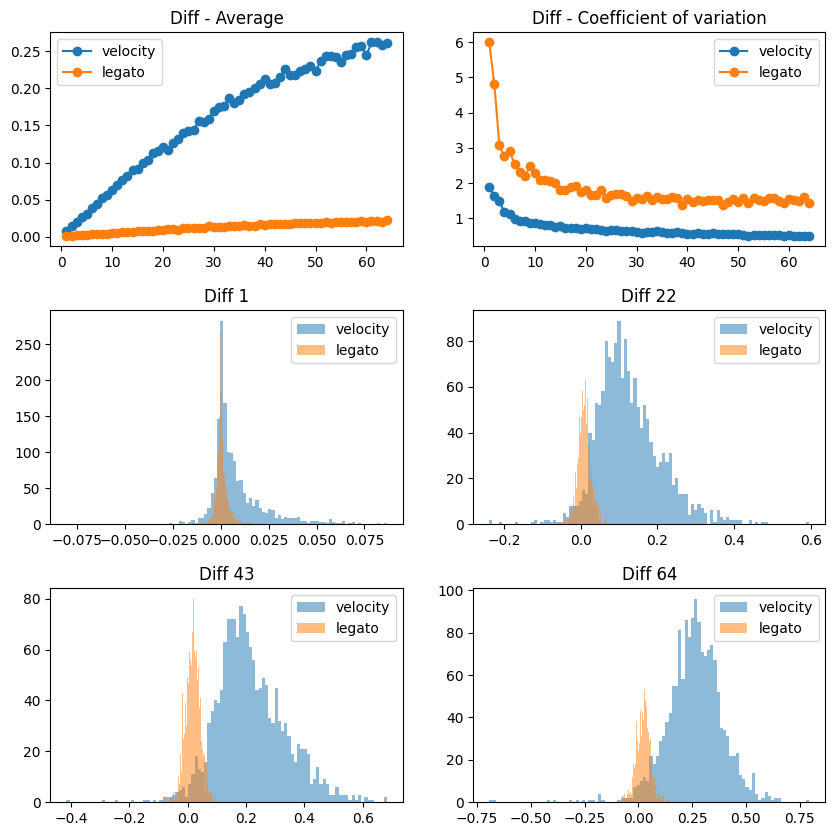

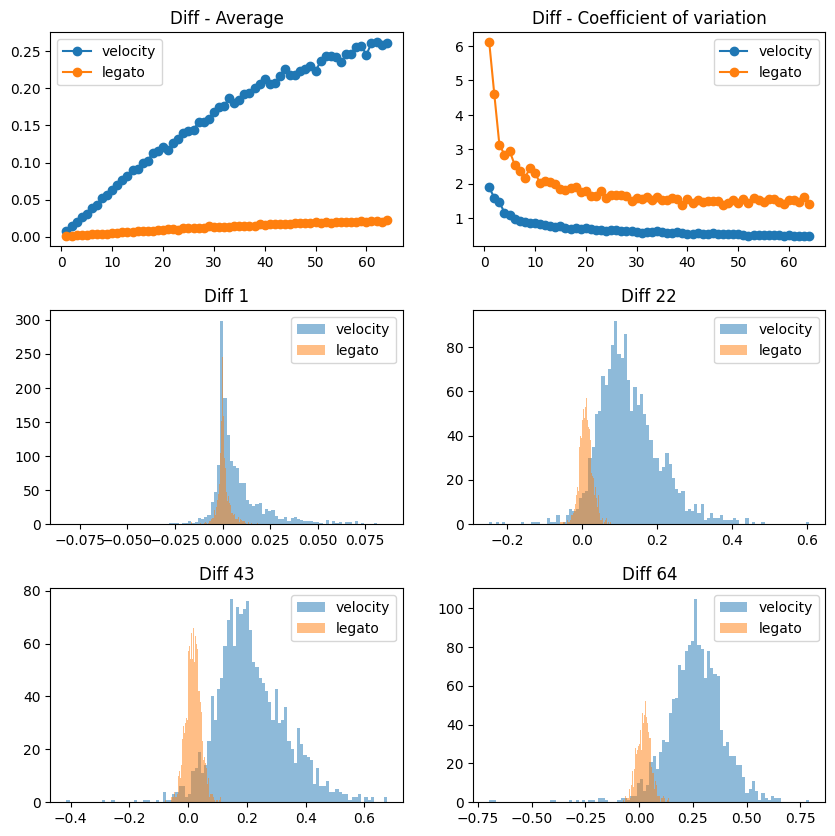

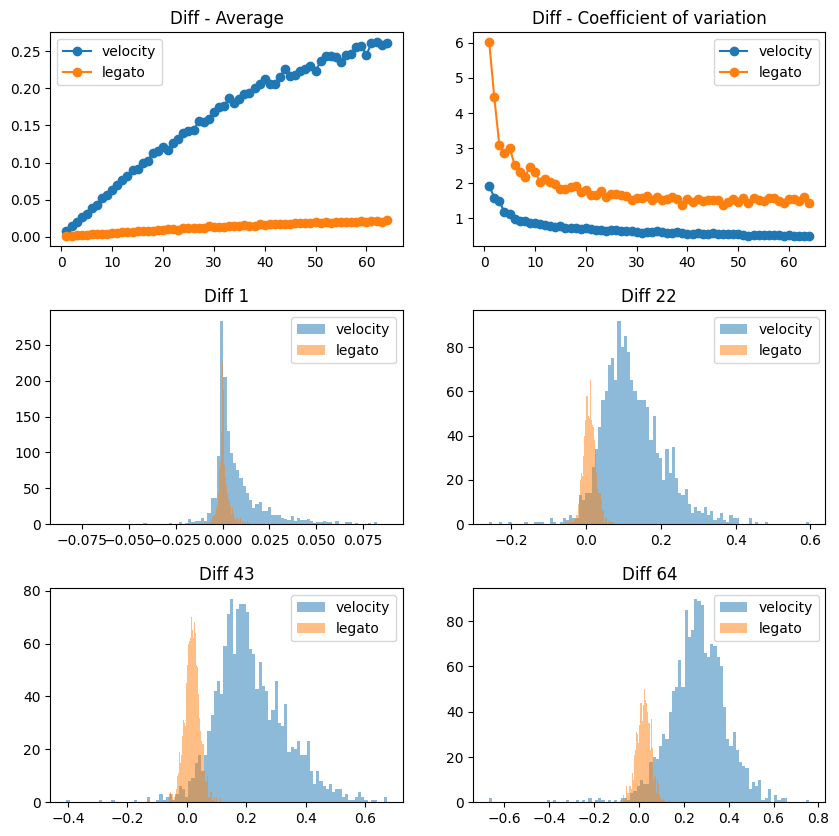

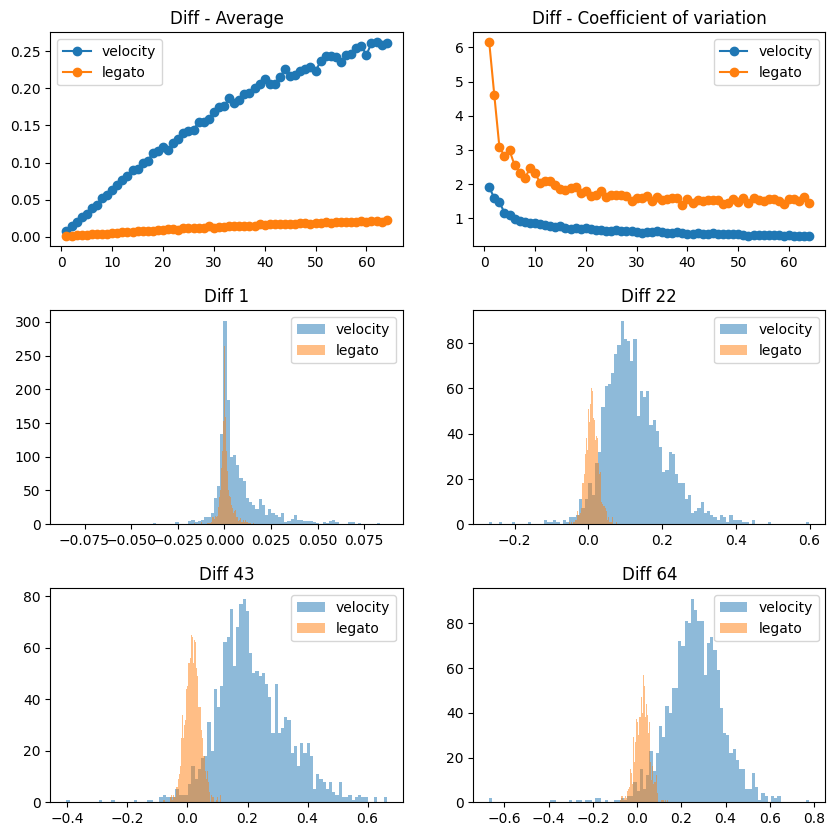

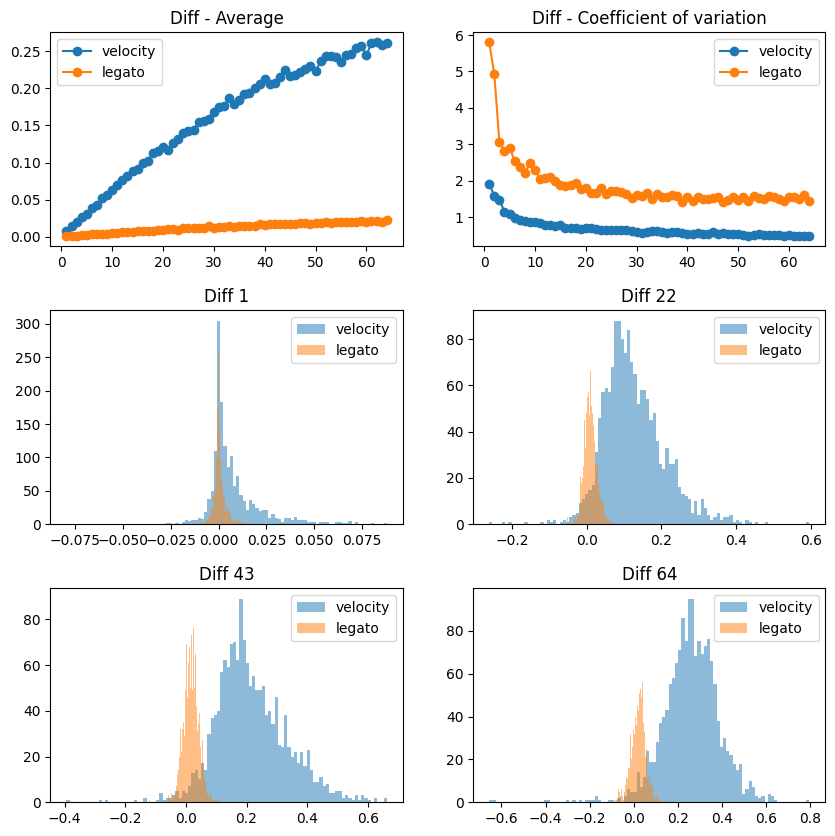

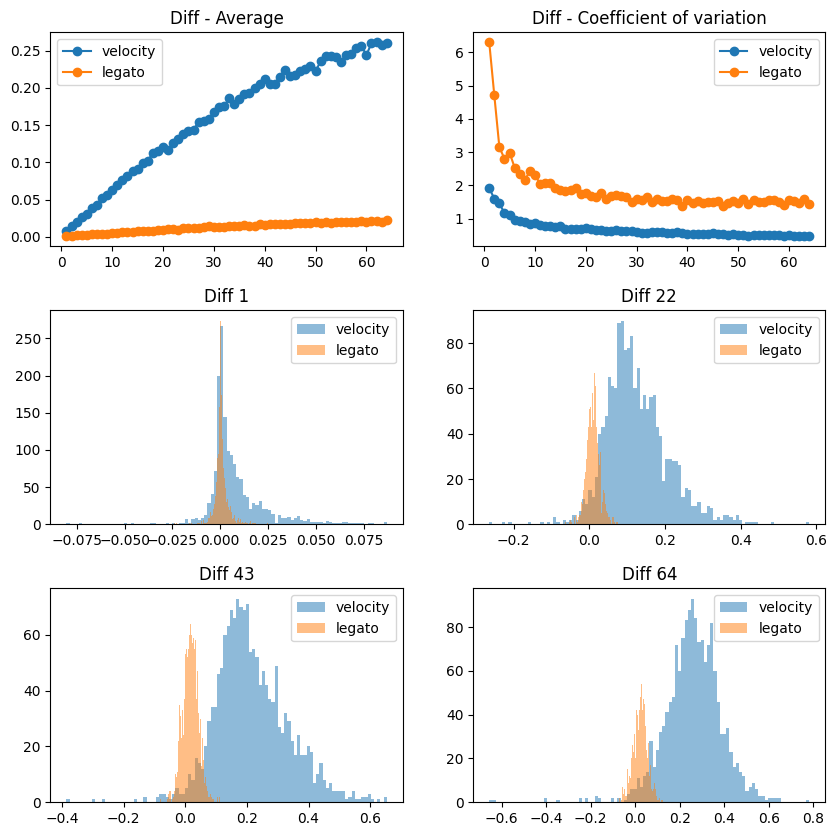

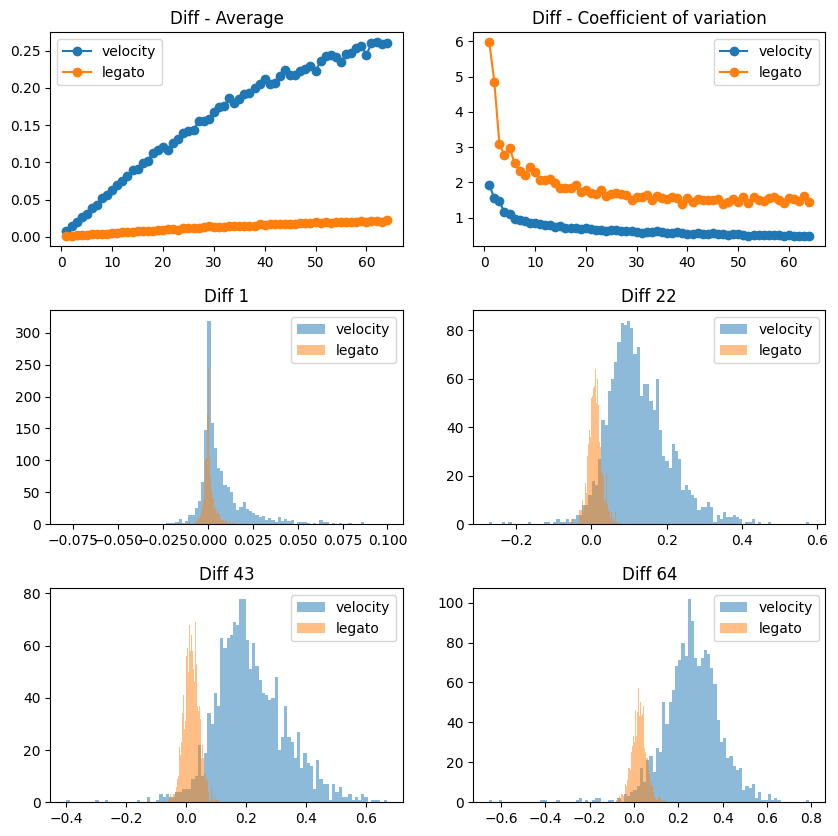

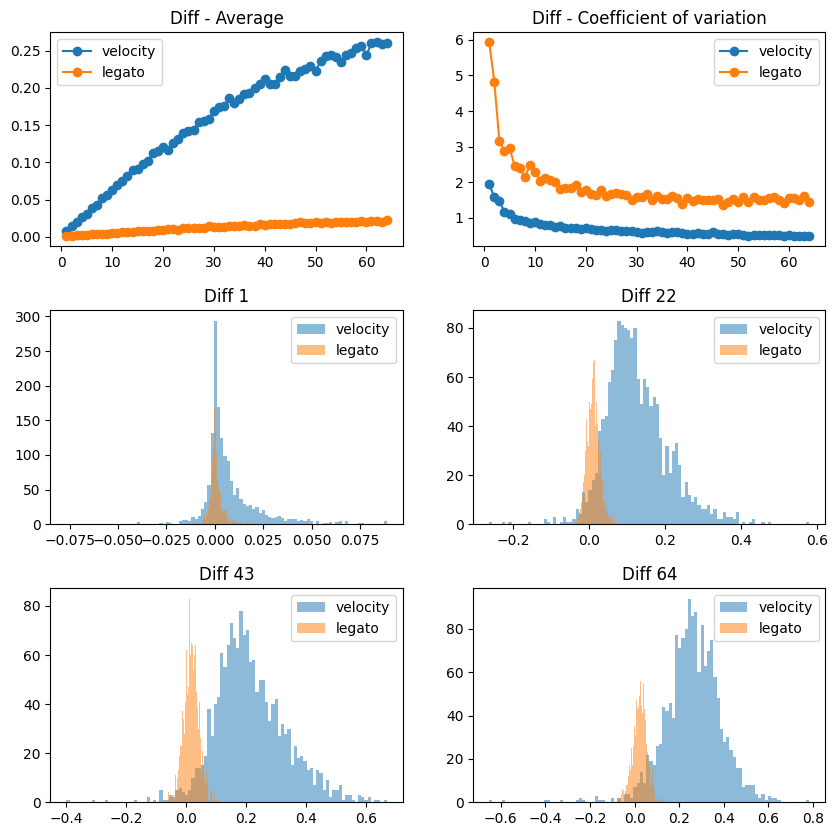

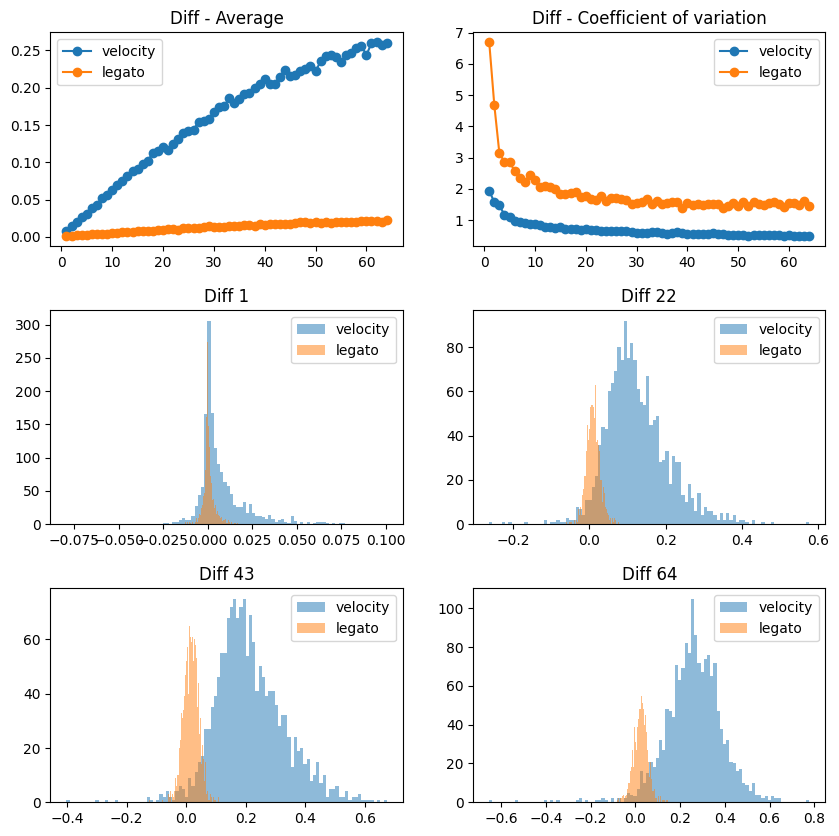

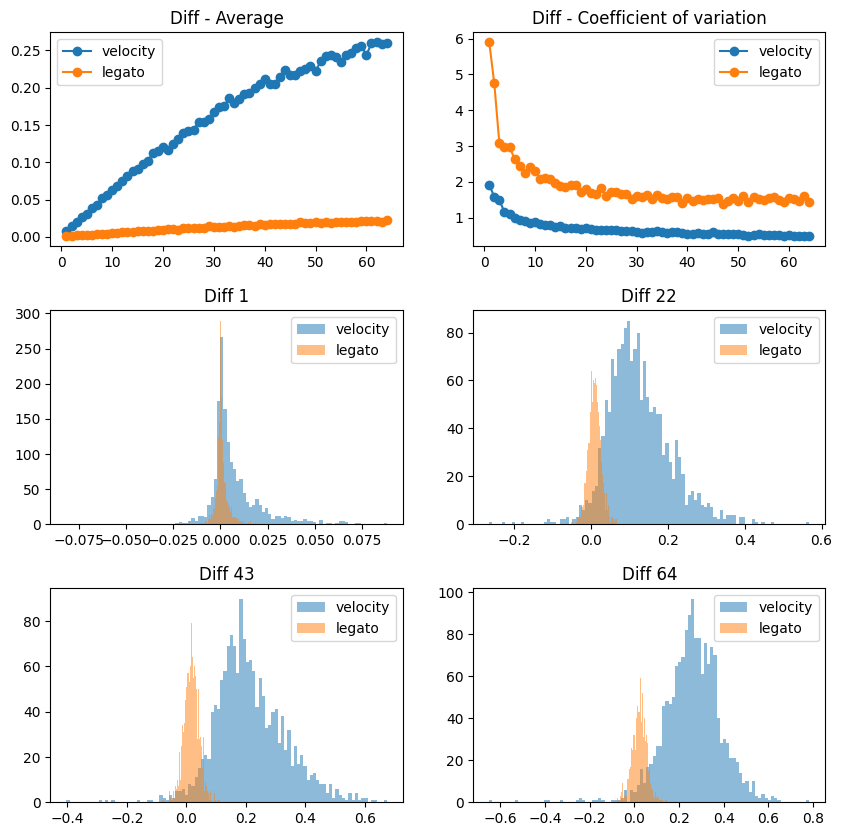

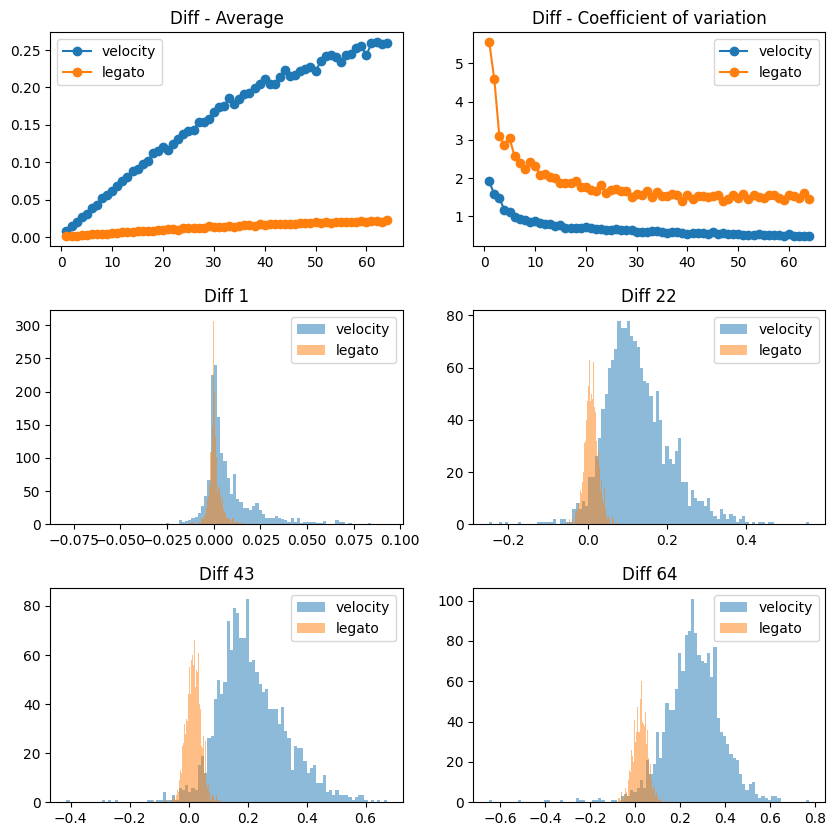

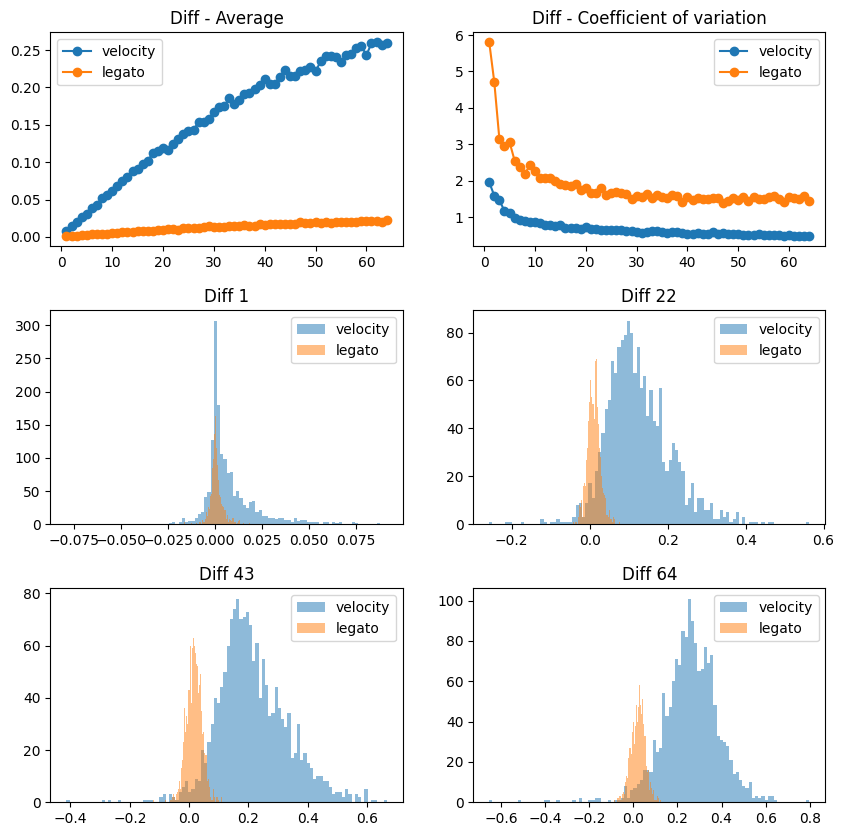

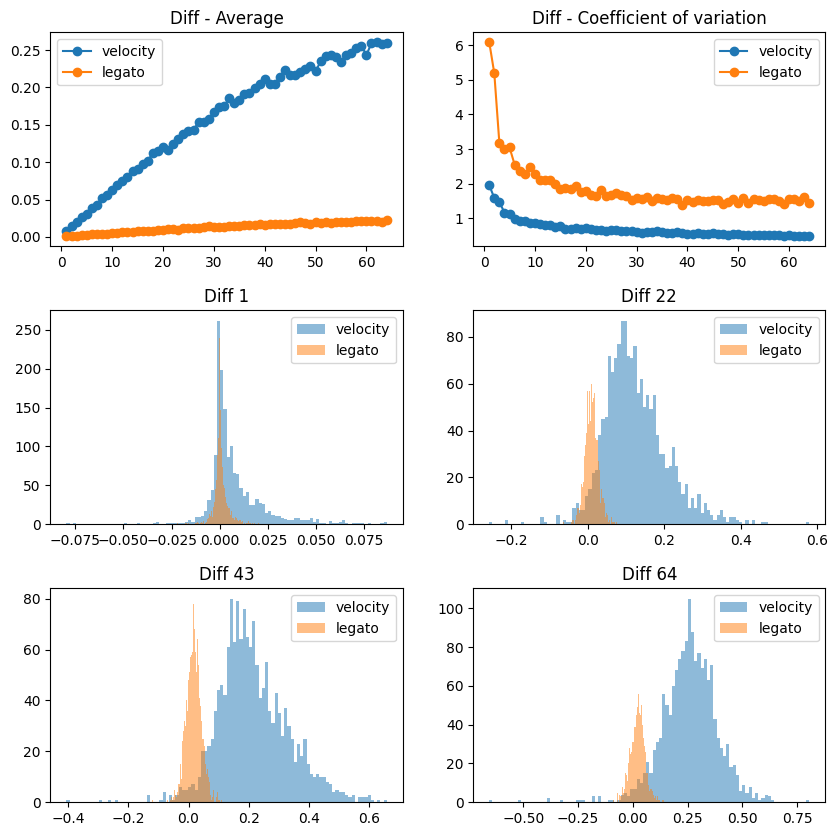

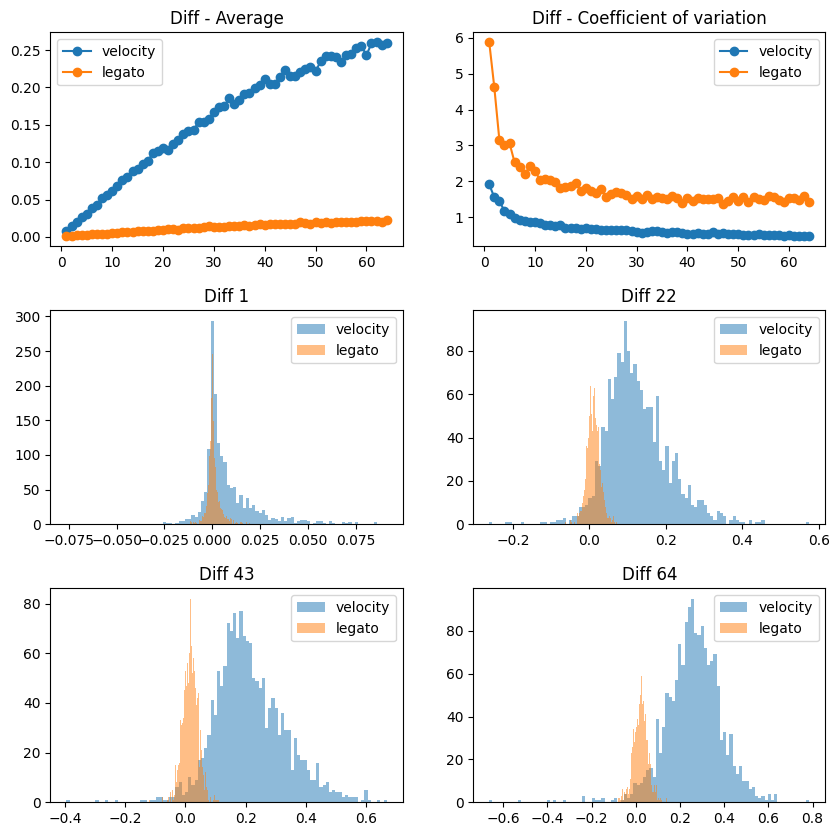

In [10]:
test(absolute_velocities[0], latent_dim[1], noise[1], architecture[1], f'1011', legw=3, epochs=30)

1011
Loading dataset...
Dataset loaded
ckpt-29 loaded
Start training...
Epoch 30/129
82301/82301 - 344s - loss: 0.2262 - val_loss: 0.2126 - occ_accuracy: 0.2000 - 344s/epoch - 4ms/step
Epoch 31/129
82301/82301 - 352s - loss: 0.2256 - val_loss: 0.2121 - occ_accuracy: 0.1997 - 352s/epoch - 4ms/step
Epoch 32/129
82301/82301 - 343s - loss: 0.2251 - val_loss: 0.2116 - occ_accuracy: 0.1996 - 343s/epoch - 4ms/step
Epoch 33/129
82301/82301 - 349s - loss: 0.2247 - val_loss: 0.2109 - occ_accuracy: 0.1994 - 349s/epoch - 4ms/step
Epoch 34/129
82301/82301 - 347s - loss: 0.2242 - val_loss: 0.2103 - occ_accuracy: 0.1994 - 347s/epoch - 4ms/step
Epoch 35/129
82301/82301 - 340s - loss: 0.2239 - val_loss: 0.2099 - occ_accuracy: 0.1995 - 340s/epoch - 4ms/step
Epoch 36/129
82301/82301 - 351s - loss: 0.2236 - val_loss: 0.2098 - occ_accuracy: 0.1991 - 351s/epoch - 4ms/step
Epoch 37/129
82301/82301 - 336s - loss: 0.2234 - val_loss: 0.2095 - occ_accuracy: 0.1993 - 336s/epoch - 4ms/step
Epoch 38/129
82301/82301

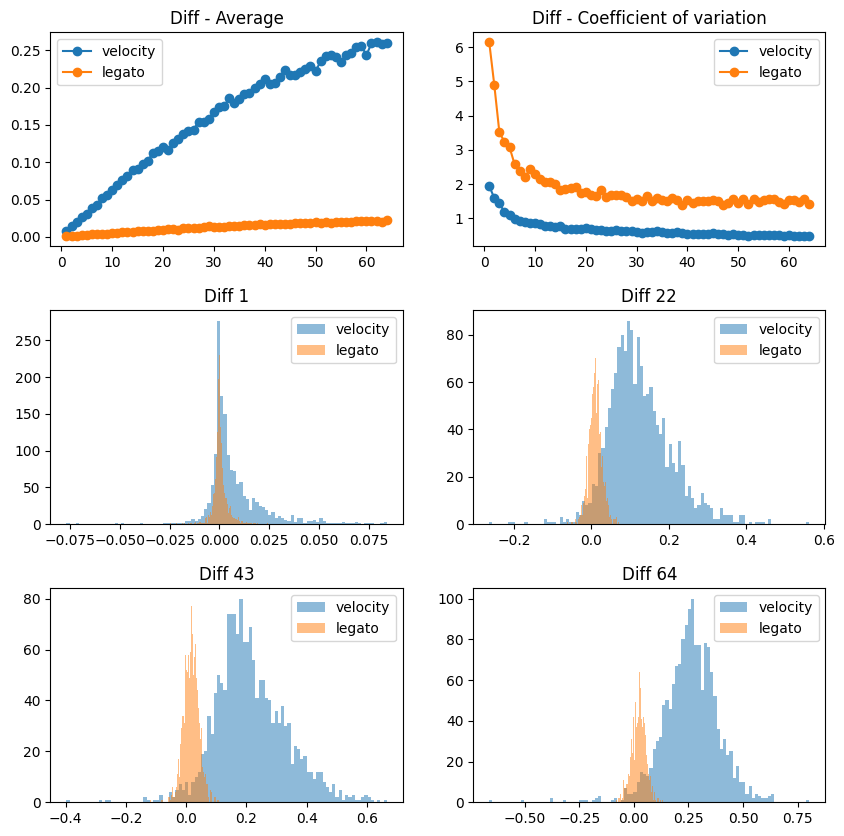

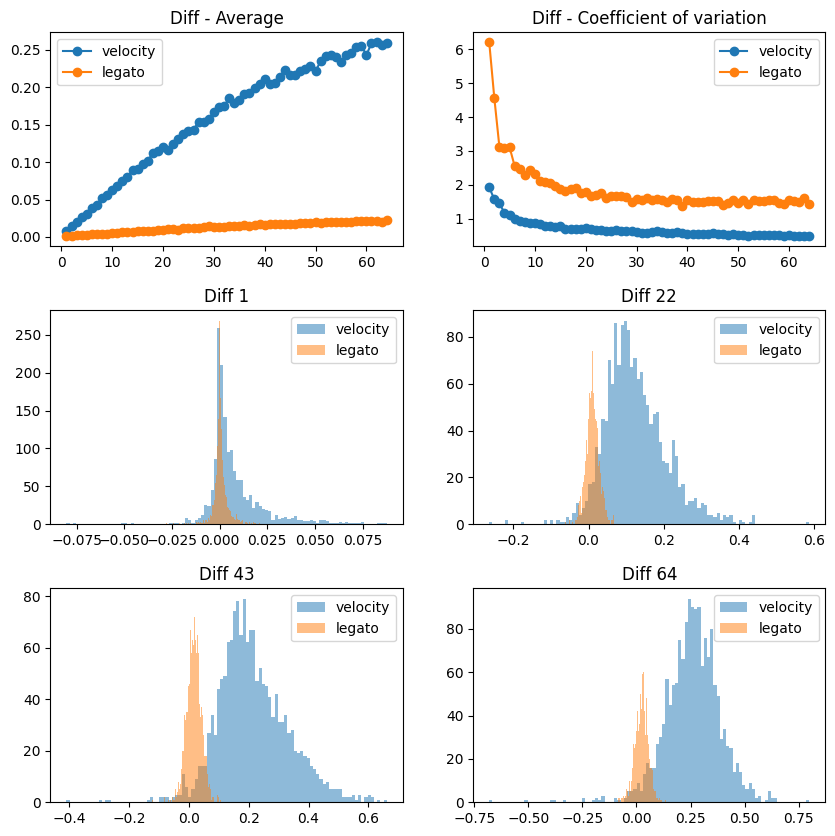

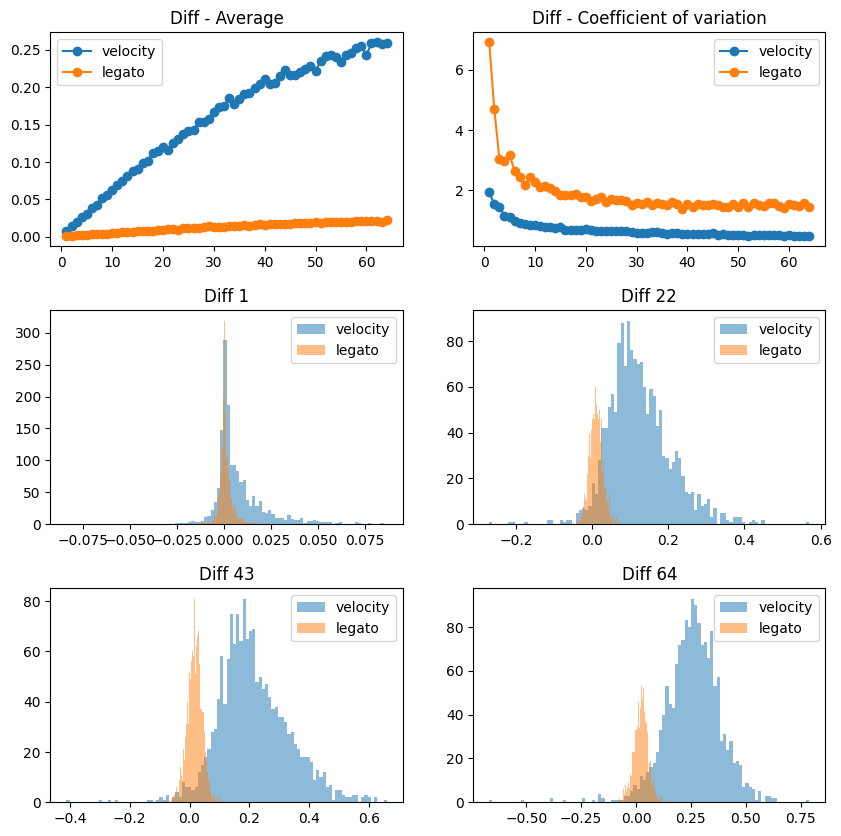

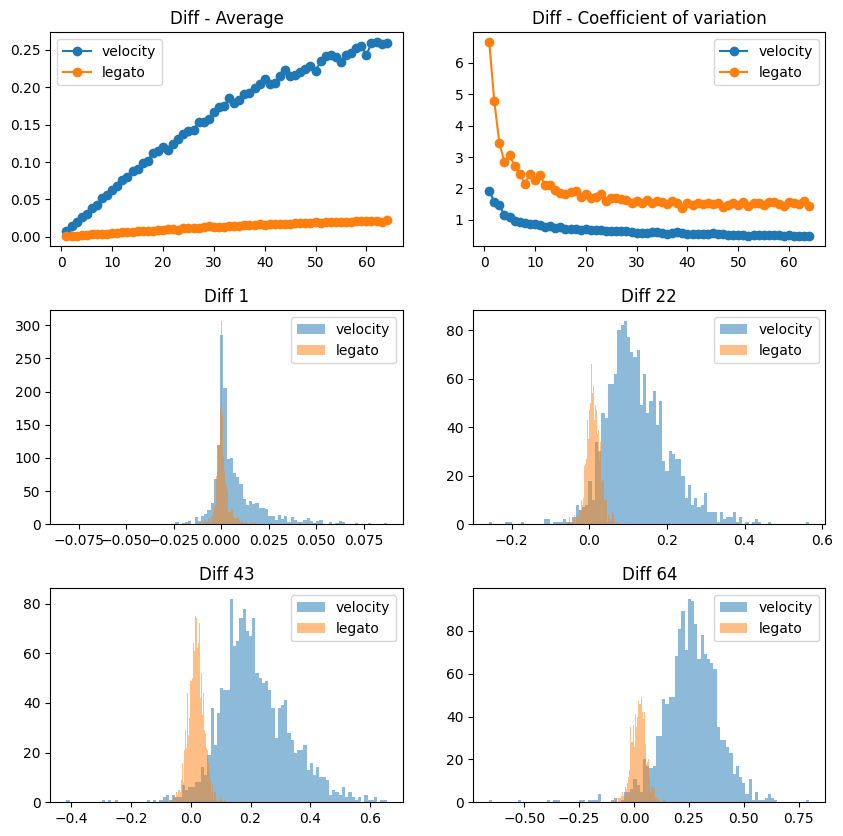

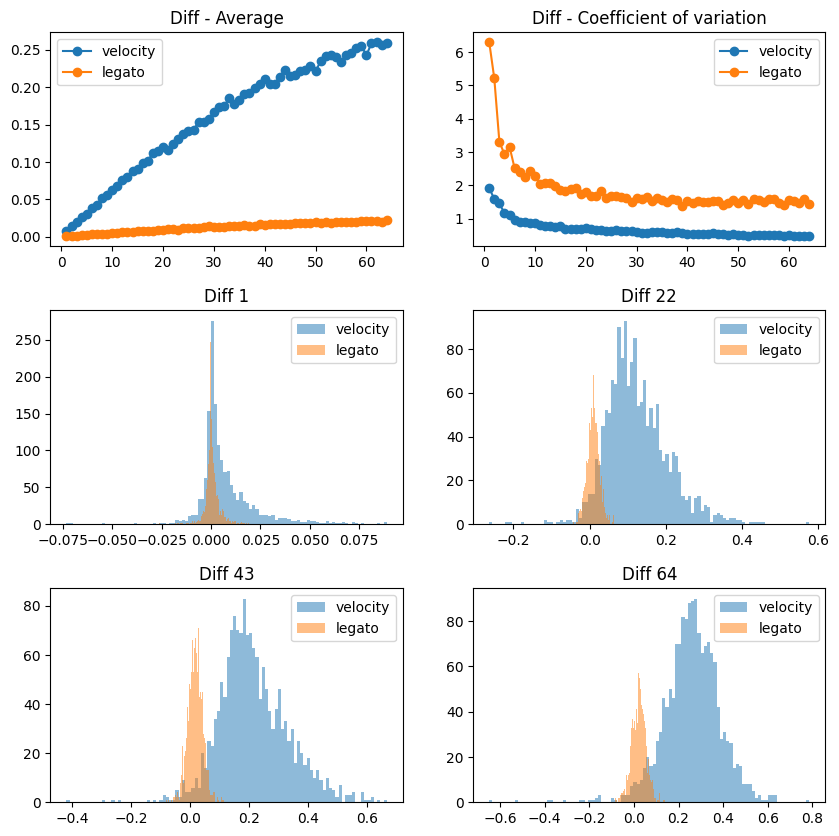

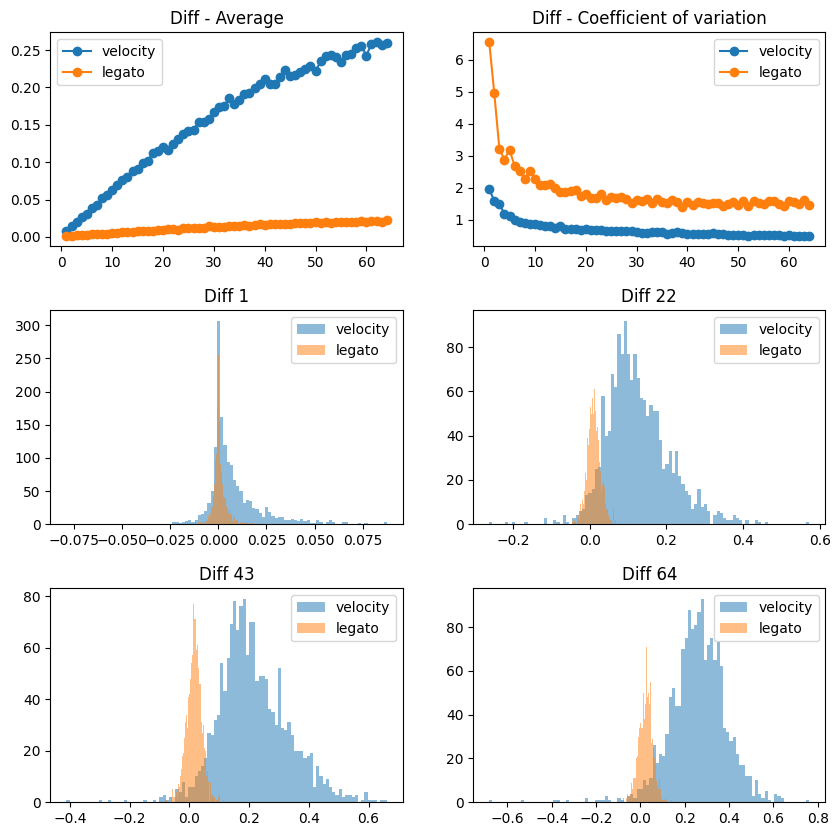

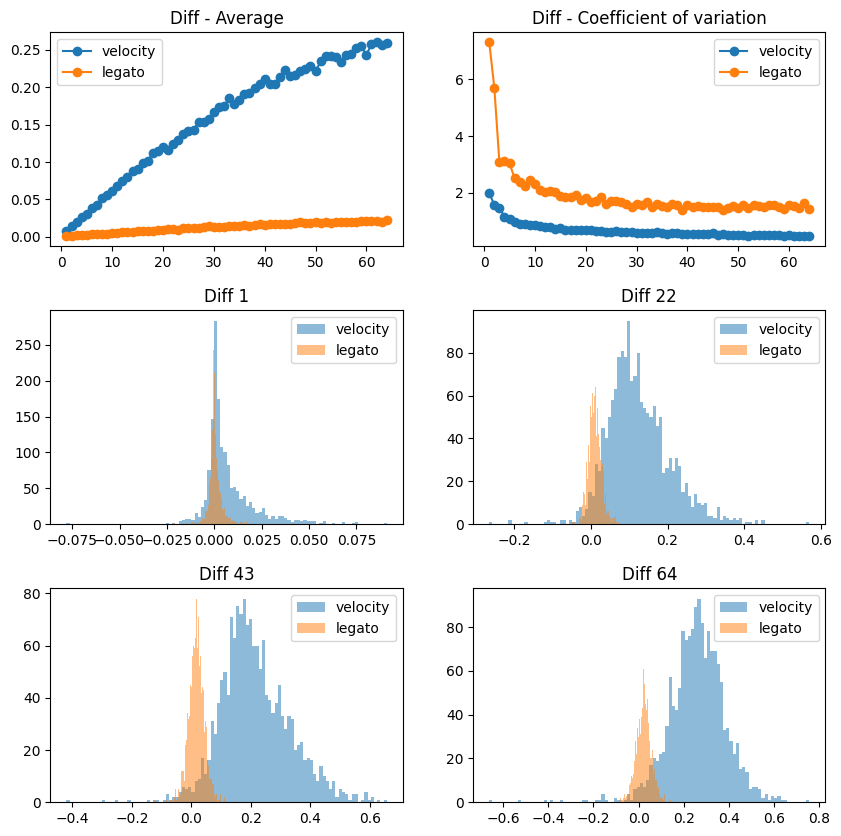

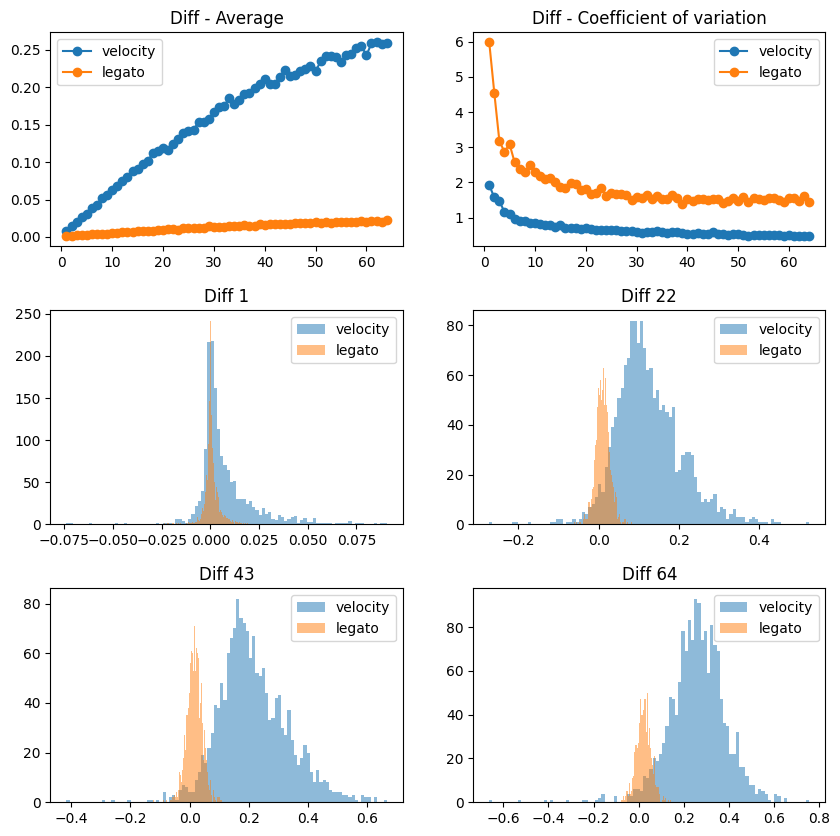

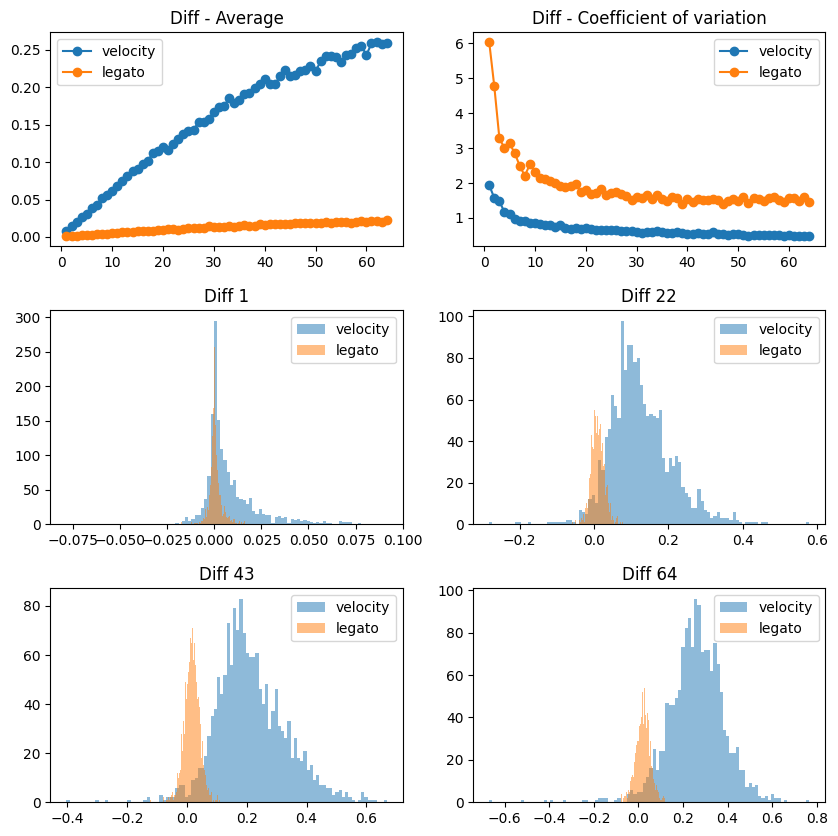

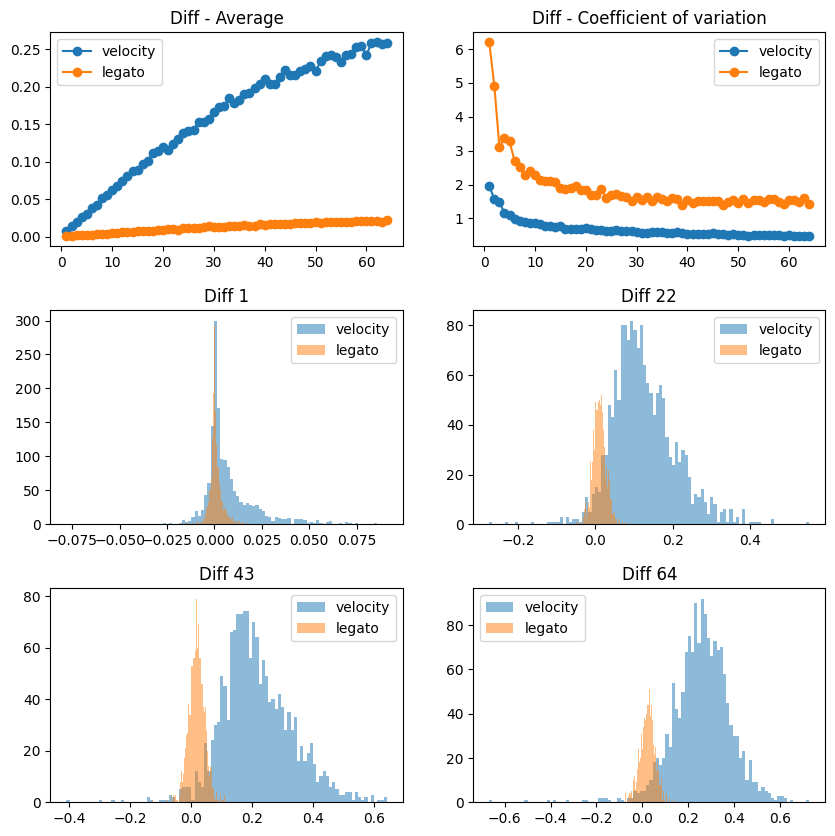

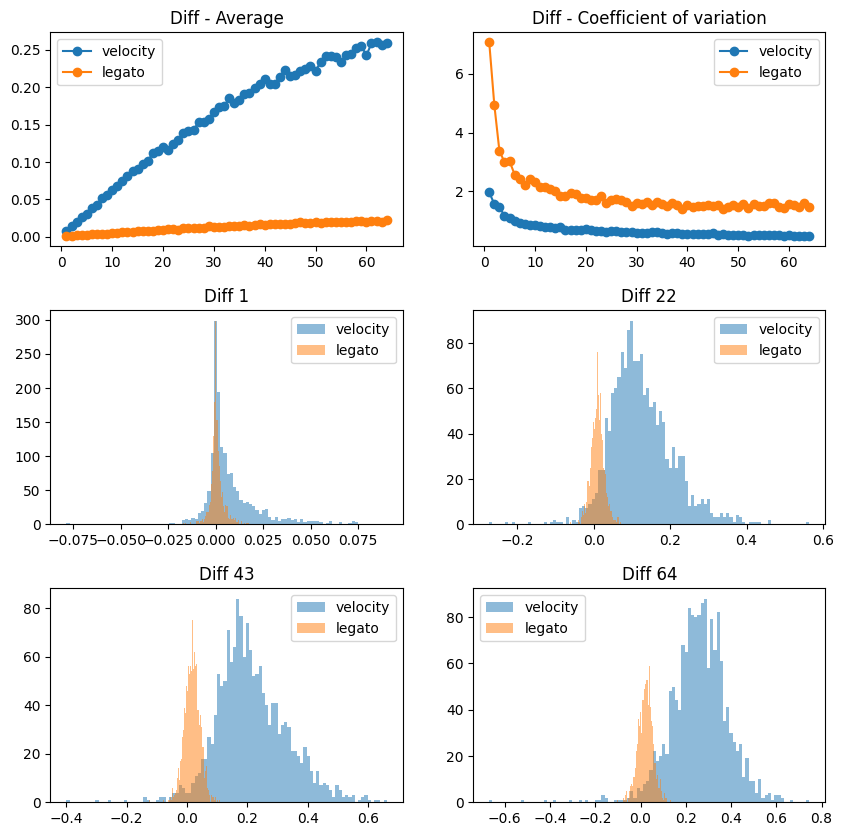

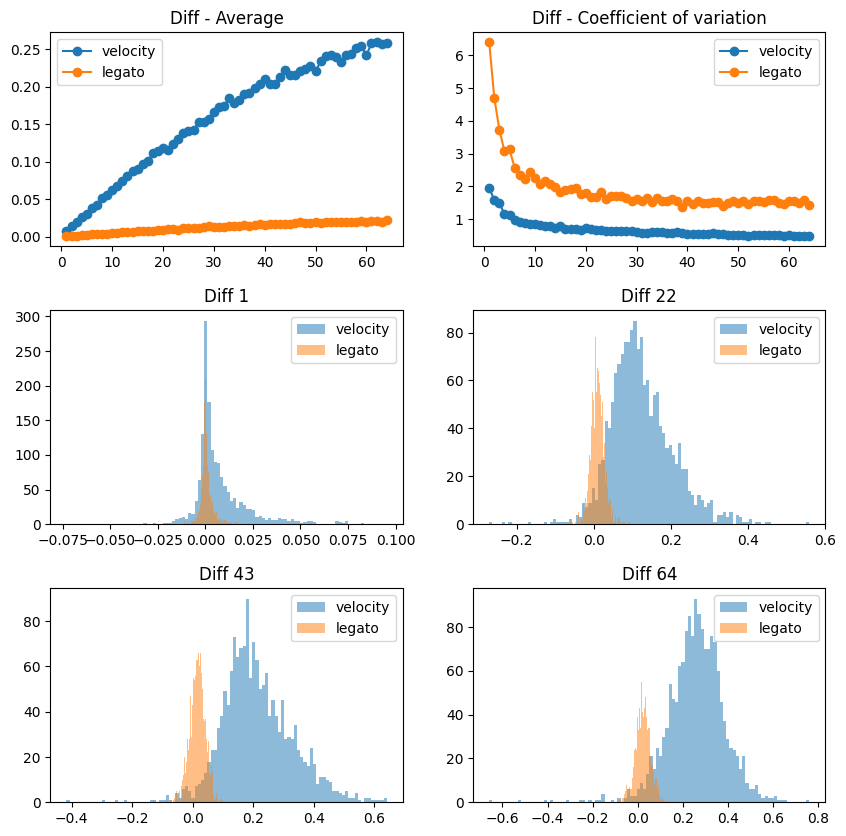

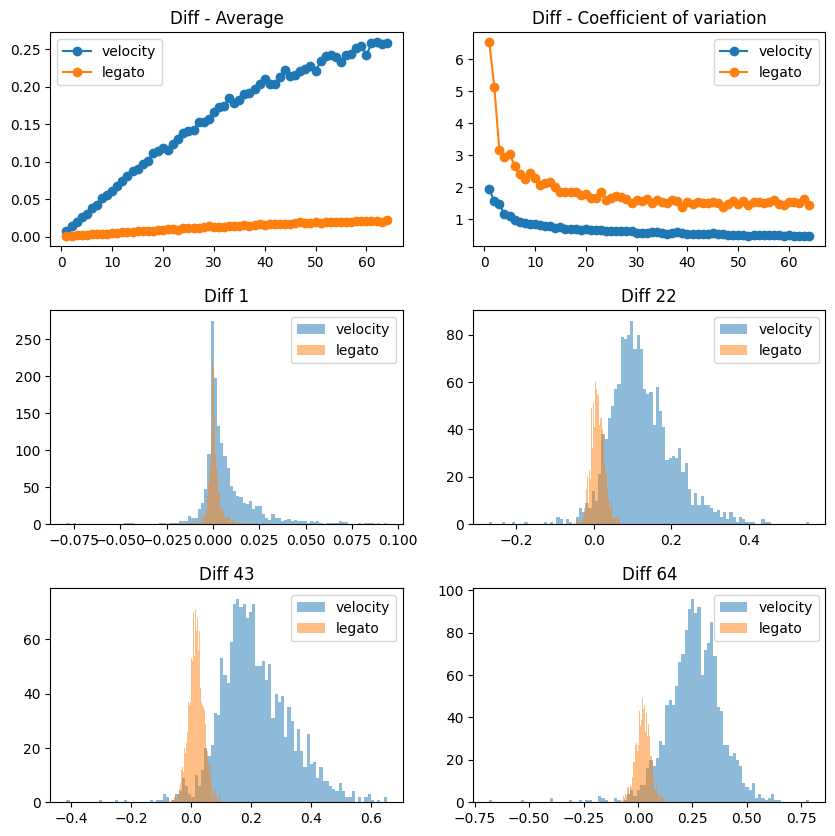

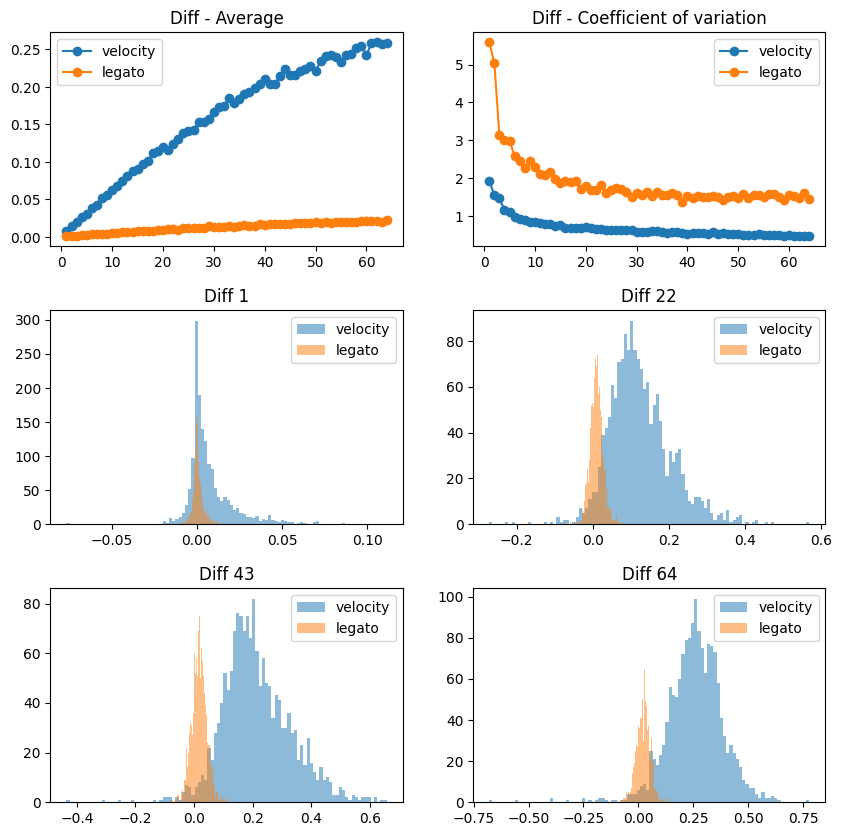

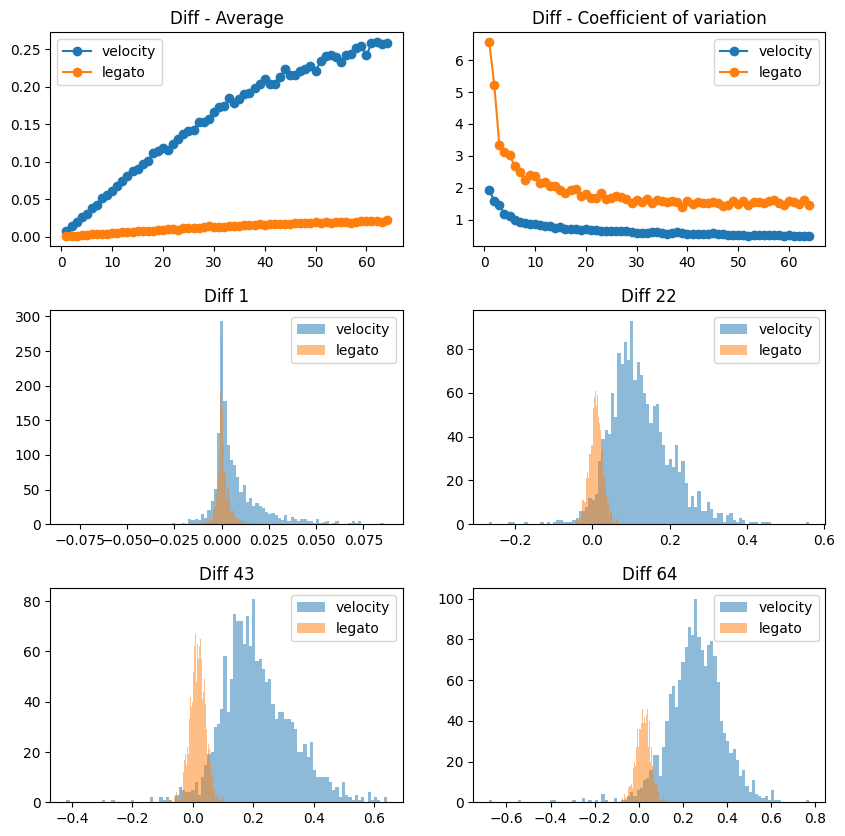

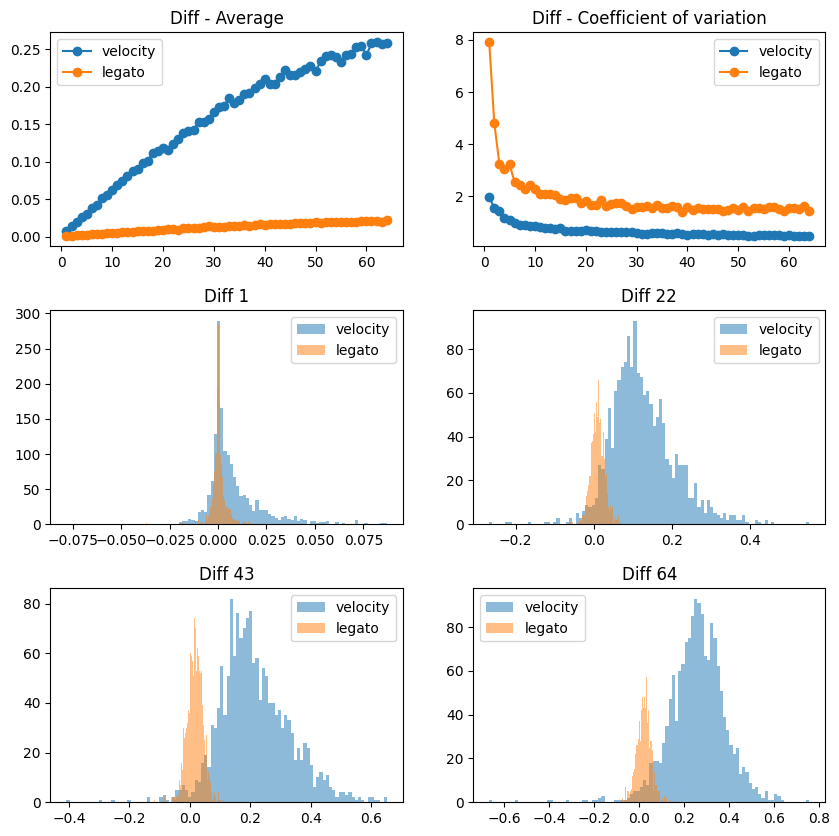

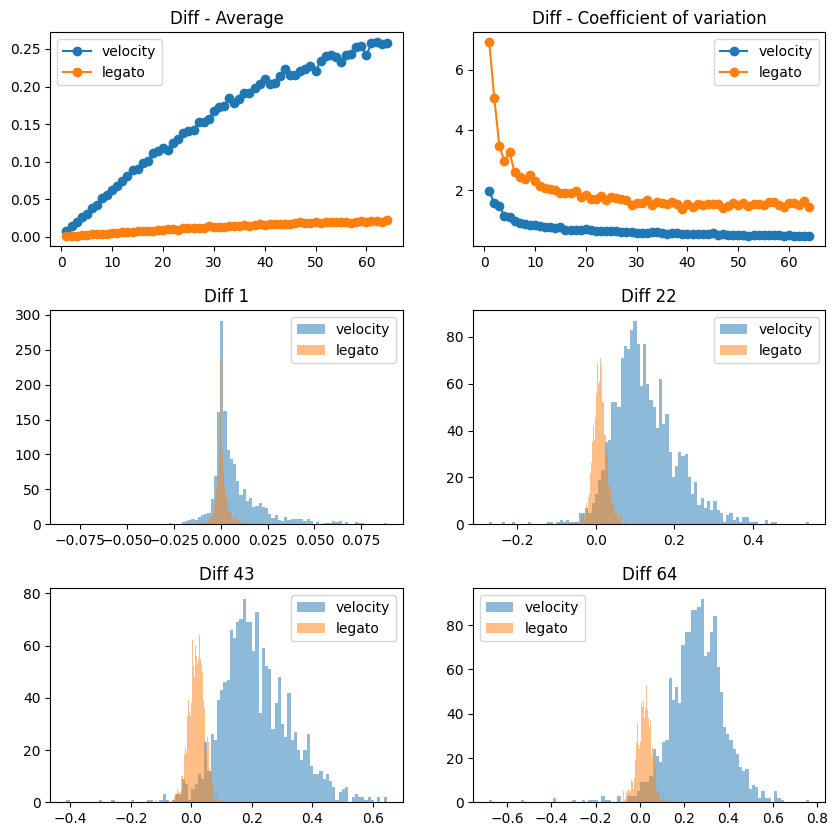

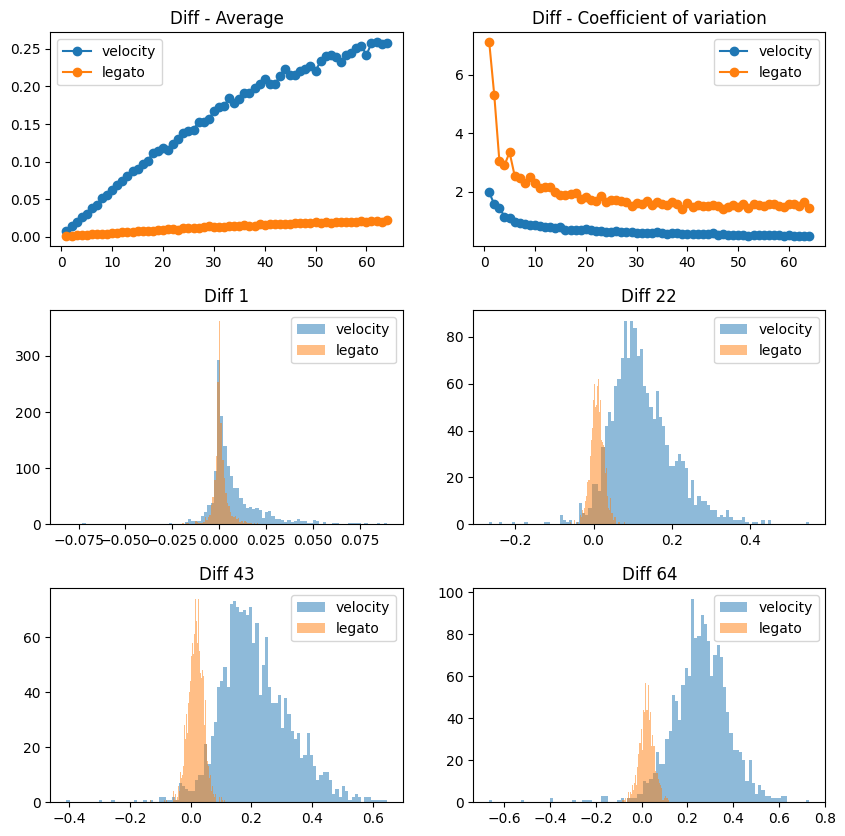

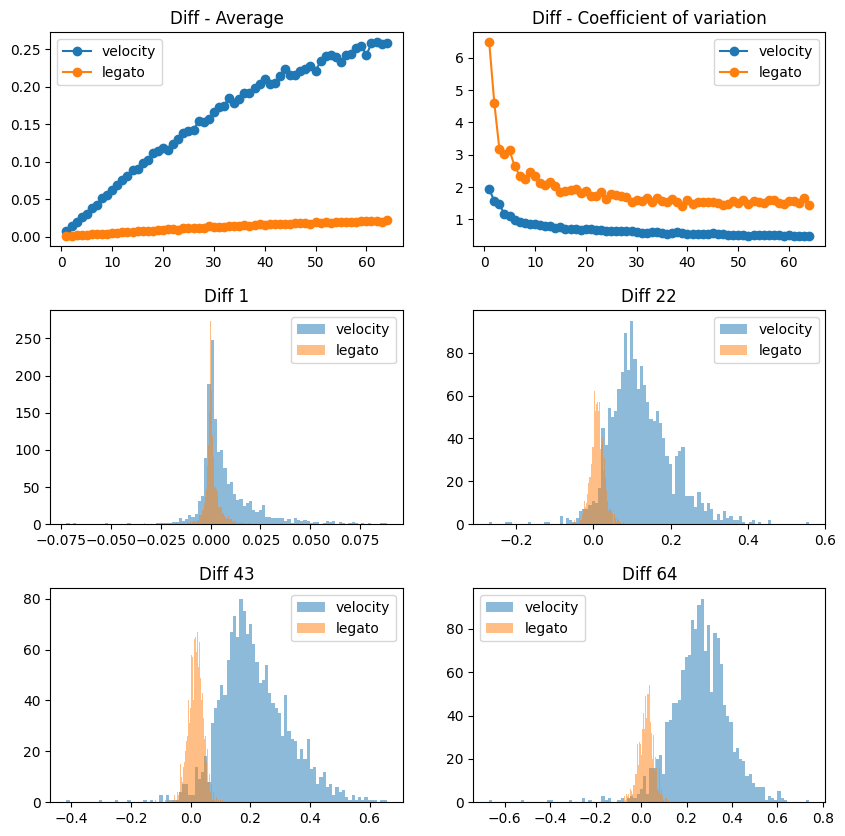

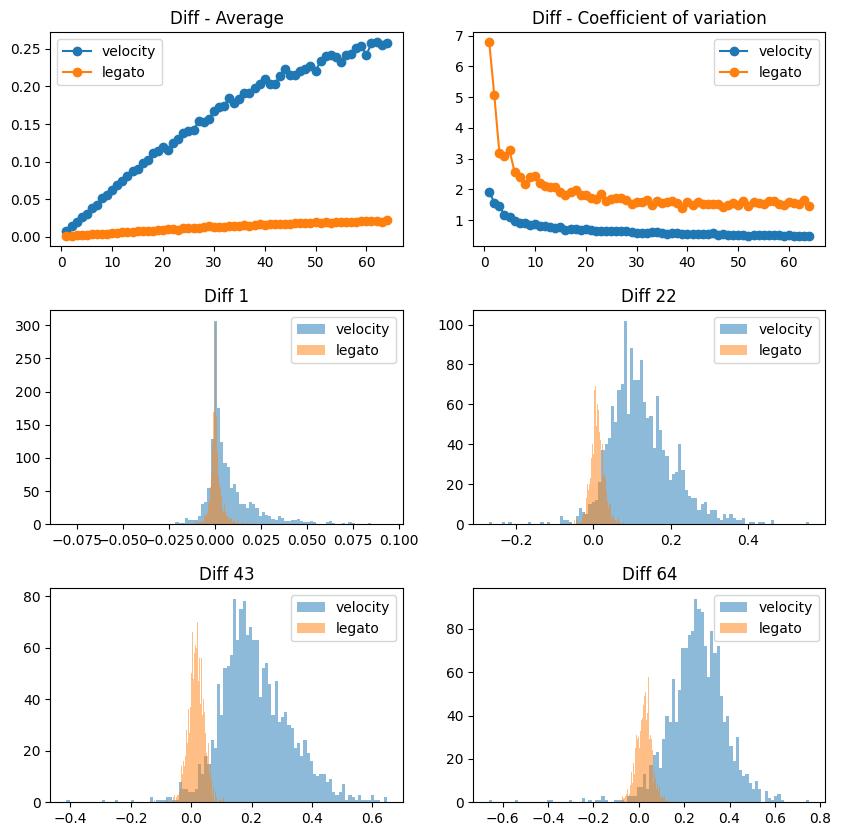

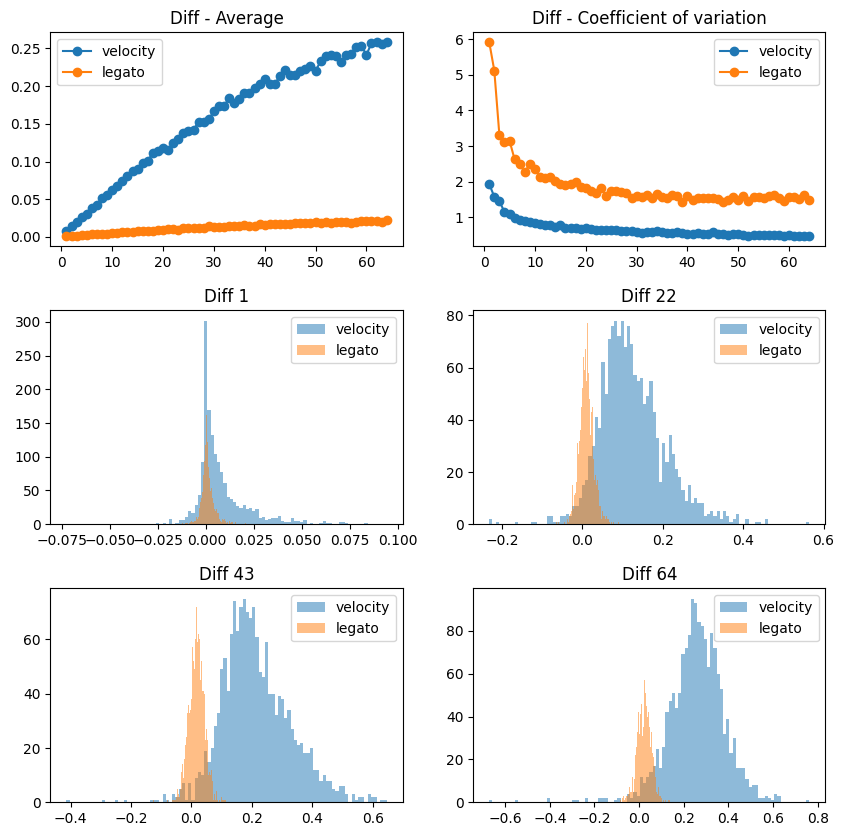

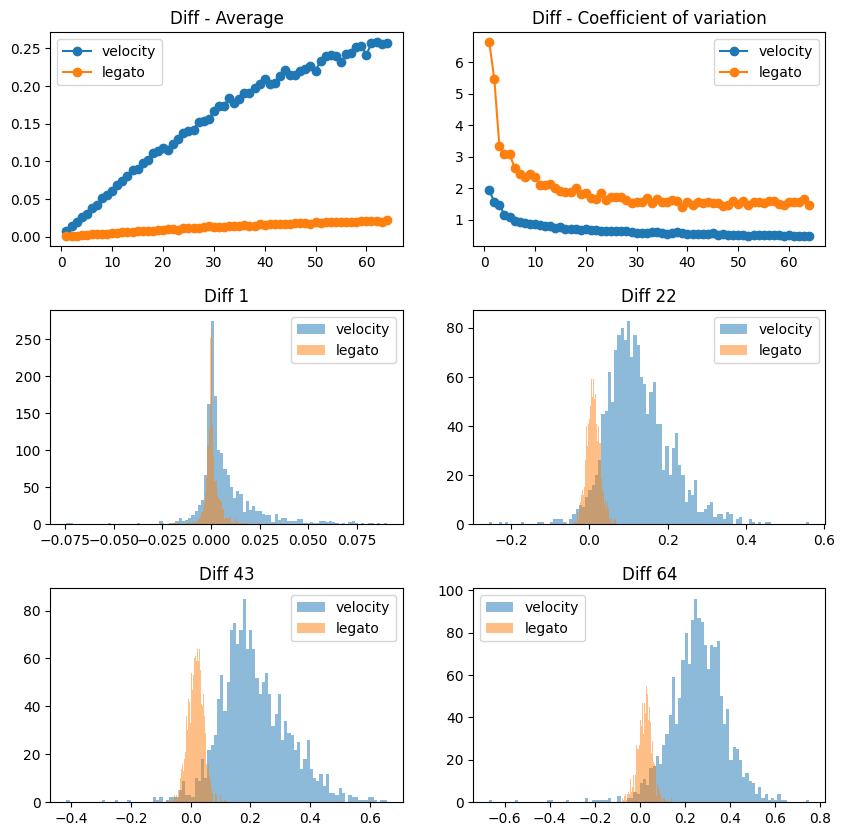

In [13]:
test(absolute_velocities[0], latent_dim[1], noise[1], architecture[1], f'1011', legw=3, checkpoint_id=29, epochs=100)

In [ ]:
test(absolute_velocities[0], latent_dim[1], noise[1], architecture[2], f'1012', legw=3, epochs=50)

1012
Loading dataset...
Dataset loaded
Start training...
Epoch 1/50
82301/82301 - 349s - loss: 0.2950 - val_loss: 0.2686 - occ_accuracy: 0.1938 - 349s/epoch - 4ms/step
Epoch 2/50
82301/82301 - 366s - loss: 0.2742 - val_loss: 0.2658 - occ_accuracy: 0.1933 - 366s/epoch - 4ms/step
Epoch 3/50


In [ ]:
test(absolute_velocities[0], latent_dim[1], noise[1], architecture[0], f'1010', legw=3, epochs=50)